# Project 04 - Brian DSI 04

## Business Case Overview

You're working as a data scientist for a contracting firm that's rapidly expanding. Now that they have their most valuable employee (you!), they need to leverage data to win more contracts. Your firm offers technology and scientific solutions and wants to be competitive in the hiring market. Your principal has two main objectives:

   1. Determine the industry factors that are most important in predicting the salary amounts for these data.
   2. Determine the factors that distinguish job categories and titles from each other. For example, can required skills accurately predict job title?

To limit the scope, your principal has suggested that you *focus on data-related job postings*, e.g. data scientist, data analyst, research scientist, business intelligence, and any others you might think of. You may also want to decrease the scope by *limiting your search to a single region.*

Hint: Aggregators like [Indeed.com](https://www.indeed.com) regularly pool job postings from a variety of markets and industries. 

**Goal:** Scrape your own data from a job aggregation tool like Indeed.com in order to collect the data to best answer these two questions.

---

## Directions

In this project you will be leveraging a variety of skills. The first will be to use the web-scraping and/or API techniques you've learned to collect data on data jobs from Indeed.com or another aggregator. Once you have collected and cleaned the data, you will use it to answer the two questions described above.

### QUESTION 1: Factors that impact salary

To predict salary you will be building either a classification or regression model, using features like the location, title, and summary of the job. If framing this as a regression problem, you will be estimating the listed salary amounts. You may instead choose to frame this as a classification problem, in which case you will create labels from these salaries (high vs. low salary, for example) according to thresholds (such as median salary).

You have learned a variety of new skills and models that may be useful for this problem:
- NLP
- Unsupervised learning and dimensionality reduction techniques (PCA, clustering)
- Ensemble methods and decision tree models
- SVM models

Whatever you decide to use, the most important thing is to justify your choices and interpret your results. *Communication of your process is key.* Note that most listings **DO NOT** come with salary information. You'll need to able to extrapolate or predict the expected salaries for these listings.

### QUESTION 2: Factors that distinguish job category

Using the job postings you scraped for part 1 (or potentially new job postings from a second round of scraping), identify features in the data related to job postings that can distinguish job titles from each other. There are a variety of interesting ways you can frame the target variable, for example:
- What components of a job posting distinguish data scientists from other data jobs?
- What features are important for distinguishing junior vs. senior positions?
- Do the requirements for titles vary significantly with industry (e.g. healthcare vs. government)?

You may end up making multiple classification models to tackle different questions. Be sure to clearly explain your hypotheses and framing, any feature engineering, and what your target variables are. The type of classification model you choose is up to you. Be sure to interpret your results and evaluate your models' performance.


### BONUS PROBLEM

Your boss would rather tell a client incorrectly that they would get a lower salary job than tell a client incorrectly that they would get a high salary job. Adjust one of your models to ease his mind, and explain what it is doing and any tradeoffs. Plot the ROC curve.

---

## Requirements

1. Scrape and prepare your own data.

2. **Create and compare at least two models for each section**. One of the two models should be a decision tree or ensemble model. The other can be a classifier or regression of your choosing (e.g. Ridge, logistic regression, KNN, SVM, etc).
   - Section 1: Job Salary Trends
   - Section 2: Job Category Factors

3. Prepare a polished Jupyter Notebook with your analysis for a peer audience of data scientists. 
   - Make sure to clearly describe and label each section.
   - Comment on your code so that others could, in theory, replicate your work.

4. A brief writeup in an executive summary, written for a non-technical audience.
   - Writeups should be at least 500-1000 words, defining any technical terms, explaining your approach, as well as any risks and limitations.

### BONUS

5. Answer the salary discussion by using your model to explain the tradeoffs between detecting high vs low salary positions.

6. Convert your executive summary into a public blog post of at least 500 words, in which you document your approach in a tutorial for other aspiring data scientists. Link to this in your notebook.

---

## Suggestions for Getting Started

1. Collect data from [Indeed.com](www.indeed.com) (or another aggregator) on data-related jobs to use in predicting salary trends for your analysis.
  - Select and parse data from *at least 1000 postings* for jobs, potentially from multiple location searches.
2. Find out what factors most directly impact salaries (e.g. title, location, department, etc).
  - Test, validate, and describe your models. What factors predict salary category? How do your models perform?
3. Discover which features have the greatest importance when determining a low vs. high paying job.
  - Your Boss is interested in what overall features hold the greatest significance.
  - HR is interested in which SKILLS and KEY WORDS hold the greatest significance.   
4. Author an executive summary that details the highlights of your analysis for a non-technical audience.
5. If tackling the bonus question, try framing the salary problem as a classification problem detecting low vs. high salary positions.

---

## Useful Resources

- Scraping is one of the most fun, useful and interesting skills out there. Don’t lose out by copying someone else's code!
- [Here is some advice on how to write for a non-technical audience](http://programmers.stackexchange.com/questions/11523/explaining-technical-things-to-non-technical-people)
- [Documentation for BeautifulSoup can be found here](http://www.crummy.com/software/BeautifulSoup/).

---

### Project Feedback + Evaluation

For all projects, students will be evaluated on a simple 3 point scale (0, 1, or 2). Instructors will use this rubric when scoring student performance on each of the core project **requirements:** 

Score | Expectations
----- | ------------
**0** | _Does not meet expectations. Try again._
**1** | _Meets expectations. Good job._
**2** | _Surpasses expectations. Brilliant!_

[For more information on how we grade our DSI projects, see our project grading walkthrough.](https://git.generalassemb.ly/dsi-projects/readme/blob/master/README.md)

# Start Project

## Import Packages

In [1]:
#  ==== Import Everything  ====
from pprint import pprint as pp2
#  pprint ( )

import csv
from collections import Counter
import math
import numpy as np
import re
import string
import scipy as sp
from scipy import stats
from scipy.stats import t

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import matplotlib.style as style
#  style.available
#  From <https://www.dataquest.io/blog/making-538-plots/>
plt.style.use('fivethirtyeight')

#  plt.show() for non Jupyter

#  only for jupyter
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import pandas as pd
from pandas.io import sql
pd.options.display.max_columns = None

import seaborn as sns
#  sns.set_style('whitegrid')
#  sns default is darkgrid or dark

#  check the style sheet
#  sns.axes_style()
#  From <https://seaborn.pydata.org/tutorial/aesthetics.html>

#  https://seaborn.pydata.org/tutorial/aesthetics.html

from time import time
from datetime import datetime
from datetime import timedelta
#  print ("Date Time Now: " ,datetime.now().strftime("%Y-%m-%d : %H-%M"))

import statsmodels.api as sm
#  timeseries - autocorrelation - ARMA
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

#  sklearn
from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import SMOTE
#  for K Fold
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, ShuffleSplit

from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, classification_report, confusion_matrix, log_loss
#  print (accuracy_score(y_test, predictions))

#  making pipelines
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

#  Feature Selection
from sklearn.feature_selection import SelectKBest, chi2, f_classif, f_regression

#  for Ridge Regression
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, LogisticRegression, LogisticRegressionCV, RidgeCV, LassoCV, ElasticNetCV


#  for K Nearest Neightbour
from sklearn.preprocessing import StandardScaler, label_binarize
#  scaler = StandardScaler()

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold

#  gridsearch
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

#  clustering
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

#  NPL - sklearn
#  from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn import svm

#  NLTK
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer


from time import time
from time import sleep
from random import randint

#  Tensorflow Keras
import tensorflow as tf
from tensorflow import keras


print('All Import Finished')

C:\Users\brian\AppData\Local\Continuum\anaconda3\envs\tensorflowanaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


All Import Finished


## Scrape and Export 1000 listings

In [2]:
"""https://medium.com/@msalmon00/web-scraping-job-postings-from-indeed-96bd588dcb4b"""

'https://medium.com/@msalmon00/web-scraping-job-postings-from-indeed-96bd588dcb4b'

In [3]:
# df_raw = pd.read_csv('./compiled_scrape/webscrape-bcwq-arysad.csv')
df_raw = pd.read_csv('./compiled_scrape/webscrape-combined-4-1.csv')
df_raw.head(5)

,Job_Title,Job_Company,Job_Description,Job_Salary,Job_Salary_Ave,Job_Salary_Min,All_Text,Cat_Sal_Ave
0,"VP, Business Data Analyst, Enterprise Data Str...",United Overseas Bank,"VP, Business Data Analyst, Enterprise Data St...",6000,5000,5000,"VP, Business Data Analyst, Enterprise Data Str...",Upper_Middle
1,Data Architect,Robert Walters (Singapore) Pte Ltd,An exciting Data Architect role has just bec...,15000,13333,13333,Data ArchitectRobert Walters (Singapore) Pte L...,Ultra
2,Data Analyst,Standard Chartered Bank Singapore,Leading the way in International Banking. We...,4500,4500,4500,Data AnalystStandard Chartered Bank Singapore ...,Upper_Middle
3,Data Architect,Standard Chartered Bank Singapore,Leading the way in International Banking. We...,4500,4500,4500,Data ArchitectStandard Chartered Bank Singapor...,Upper_Middle
4,Data Manager,Standard Chartered Bank Singapore,"This role reports to the project lead, Retai...",4500,4500,4500,Data ManagerStandard Chartered Bank Singapore ...,Upper_Middle


In [4]:
def Cat_Sal_Ave_Int(x):
    if x == 'Entry':
        return 1
    elif x == 'Middle':
        return 2
    elif x == 'Upper_Middle':
        return 3
    elif x == 'High':
        return 4
    elif x == 'Ultra':
        return 5
    else:
        return 0


df_raw['Cat_Sal_Ave_Int'] = df_raw['Cat_Sal_Ave'].apply(
    lambda x: Cat_Sal_Ave_Int(x))
df_raw

,Job_Title,Job_Company,Job_Description,Job_Salary,Job_Salary_Ave,Job_Salary_Min,All_Text,Cat_Sal_Ave,Cat_Sal_Ave_Int
0,"VP, Business Data Analyst, Enterprise Data Str...",United Overseas Bank,"VP, Business Data Analyst, Enterprise Data St...",6000,5000,5000,"VP, Business Data Analyst, Enterprise Data Str...",Upper_Middle,3
1,Data Architect,Robert Walters (Singapore) Pte Ltd,An exciting Data Architect role has just bec...,15000,13333,13333,Data ArchitectRobert Walters (Singapore) Pte L...,Ultra,5
2,Data Analyst,Standard Chartered Bank Singapore,Leading the way in International Banking. We...,4500,4500,4500,Data AnalystStandard Chartered Bank Singapore ...,Upper_Middle,3
3,Data Architect,Standard Chartered Bank Singapore,Leading the way in International Banking. We...,4500,4500,4500,Data ArchitectStandard Chartered Bank Singapor...,Upper_Middle,3
4,Data Manager,Standard Chartered Bank Singapore,"This role reports to the project lead, Retai...",4500,4500,4500,Data ManagerStandard Chartered Bank Singapore ...,Upper_Middle,3
5,"Head, Big Data Engineering (Chief Data Office)",Standard Chartered Bank Singapore,Leading the way in International Banking. We ...,4500,4500,4500,"Head, Big Data Engineering (Chief Data Office)...",Upper_Middle,3
6,Data Analyst,Helius Technologies Pte Ltd,2-3 years of experience in SQL. Knowledge of...,6000,5000,5000,Data AnalystHelius Technologies Pte Ltd 2-3 y...,Upper_Middle,3
7,"Data Lead, FCC Screening, Chief Data Office",Standard Chartered Bank Singapore,Leading the way in International Banking. We ...,4500,4500,4500,"Data Lead, FCC Screening, Chief Data OfficeSta...",Upper_Middle,3
8,Senior Data Analyst,OCBC Bank,Senior Data Analyst Deep dive into our data...,6000,5000,5000,Senior Data AnalystOCBC Bank Senior Data Analy...,Upper_Middle,3
9,"Data Analyst, Group Data Management Office (1 ...",OCBC Bank,"Data Analyst, Group Data Management Office (1...",6000,5000,5000,"Data Analyst, Group Data Management Office (1 ...",Upper_Middle,3


In [5]:
print(df_raw.shape)

(1148, 9)


In [6]:
df = df_raw.copy()
df.shape

(1148, 9)

## EDA

### Check for Nan

In [7]:
df.isnull().sum()

Job_Title          0
Job_Company        0
Job_Description    0
Job_Salary         0
Job_Salary_Ave     0
Job_Salary_Min     0
All_Text           0
Cat_Sal_Ave        0
Cat_Sal_Ave_Int    0
dtype: int64

### Check some base statistics

C:\Users\brian\AppData\Local\Continuum\anaconda3\envs\tensorflowanaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


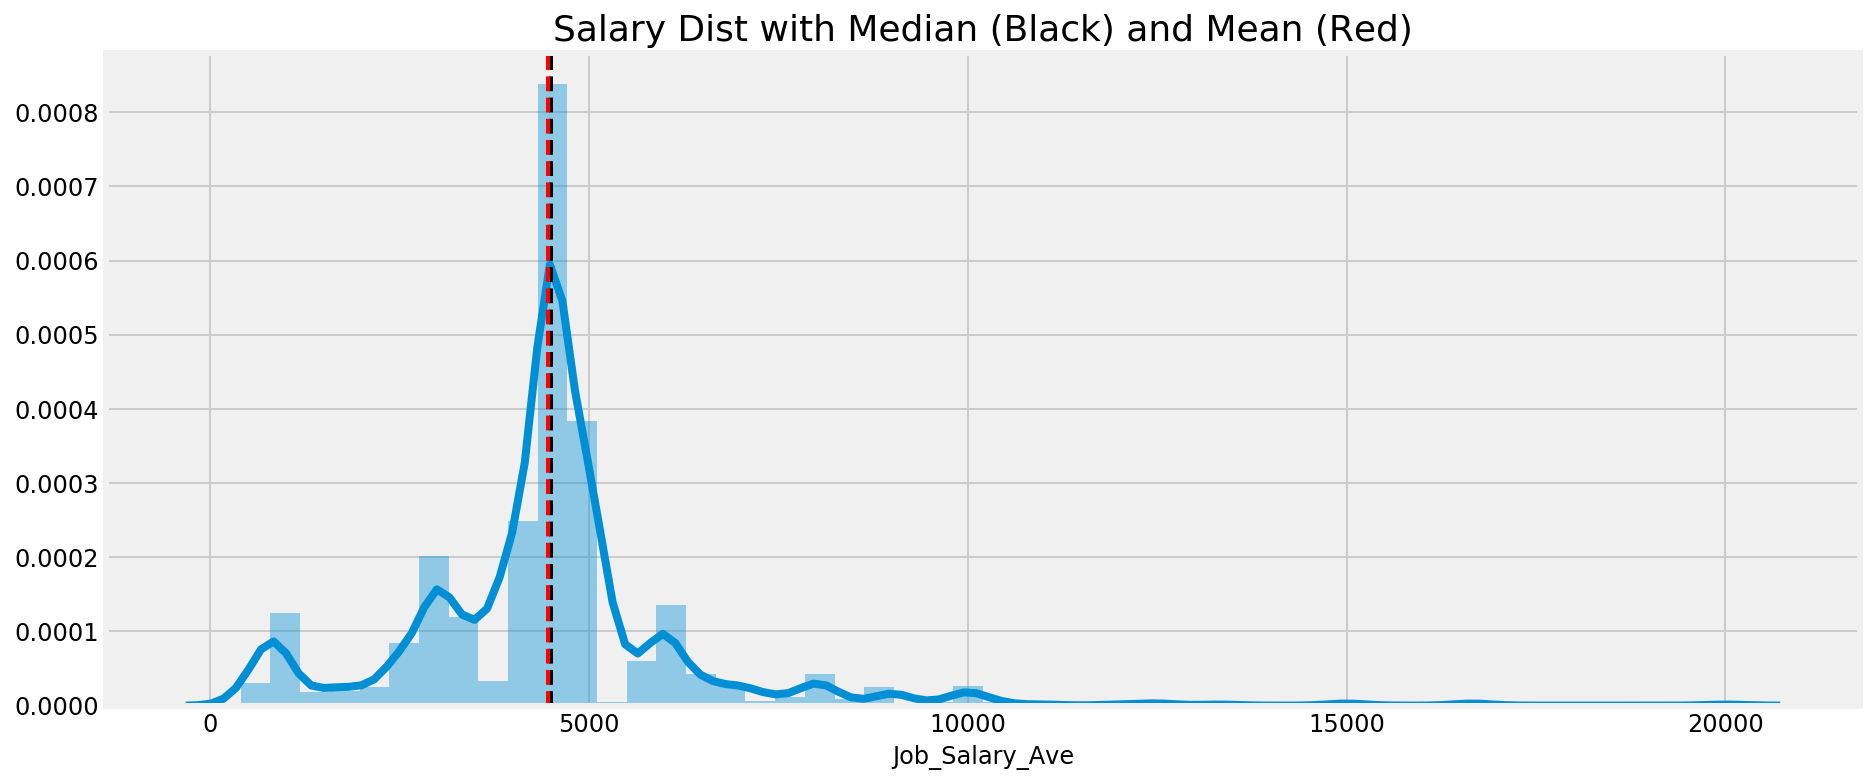

In [8]:
#  plotting salary distribution, with vertical lines to represent the mean and median salary
sal_plt = df[df["Job_Salary_Ave"].notnull()]
sal_plt_ = sal_plt["Job_Salary_Ave"]
fig = plt.figure()
fig.set_size_inches(14, 6)
ax = sns.distplot(sal_plt_)
ax.axvline(sal_plt_.median(), lw=2, ls='dashed', color='black')
ax.axvline(sal_plt_.mean(), lw=2, ls='dashed', color='red')

plt.xlabel('Job_Salary_Ave', size=12)
plt.yticks(size=12)
plt.xticks(size=12)

plt.title('Salary Dist with Median (Black) and Mean (Red)', size=18)
plt.show()

### Mean and Median Salary View

In [9]:
print('Median: {}\nMean: {}'.format(sal_plt_.median(), sal_plt_.mean()))

Median: 4500.0
Mean: 4455.293554006968


In [10]:
print(sorted(list(sal_plt_.unique())))

[400, 450, 500, 600, 700, 800, 850, 900, 1000, 1120, 1250, 1300, 1500, 1600, 1700, 1800, 2000, 2200, 2400, 2500, 2600, 2700, 2750, 2800, 2850, 2900, 3000, 3100, 3200, 3250, 3300, 3400, 3500, 3600, 3700, 3750, 3800, 3900, 4000, 4091, 4100, 4166, 4200, 4250, 4300, 4500, 4600, 4700, 4800, 4900, 5000, 5256, 5300, 5500, 5600, 5700, 5800, 6000, 6200, 6400, 6500, 6666, 7000, 7100, 7200, 7400, 7482, 7500, 8000, 8300, 8333, 8500, 9000, 9500, 9533, 10000, 10400, 11000, 12000, 12500, 13333, 15000, 16666, 20000]


In [11]:
msk = np.random.rand(len(df)) < 0.99
train = df[msk]
test = df[~msk]
print(train.shape, test.shape)

(1134, 9) (14, 9)


### Take a look of how many Classes I have

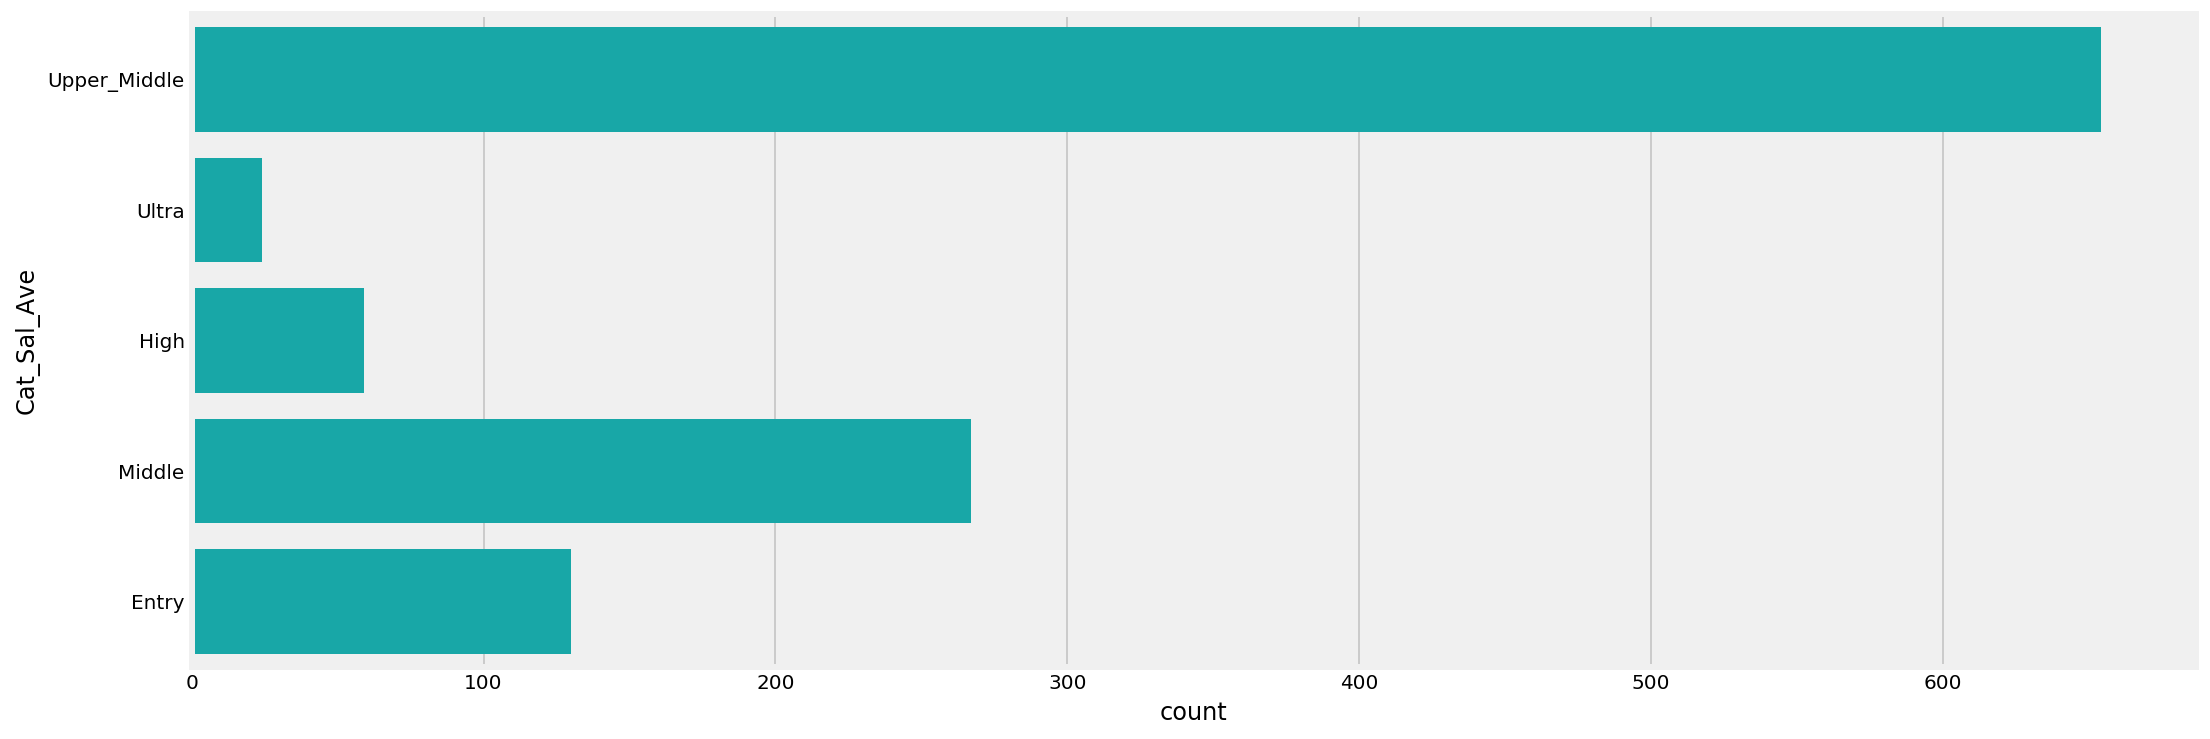

In [12]:
classes = train['Cat_Sal_Ave']
fig, ax = plt.subplots()
fig.set_size_inches(16, 6)
sns.countplot(y="Cat_Sal_Ave", data=train, color="c")

### BASELINE dummy Classifier - 63%

In [13]:
X0 = train['All_Text']
y0 = train['Cat_Sal_Ave']

X_train0, X_test0, y_train0, y_test0 = train_test_split(X0, y0, test_size=0.2)

# Create dummy classifer
dummy = Pipeline(steps=[('cvec',CountVectorizer(ngram_range=(1,2),stop_words=stopwords)),
                        ('tfidfT',TfidfTransformer()),
                        ('Dclass',DummyClassifier(strategy='most_frequent', random_state=90))])

# "Train" model
dummy.fit(X_train0, y_train0)

# Get accuracy score
dummy.score(X_test0, y_test0)  

0.5418502202643172

In [14]:
# Display first 5 training samples
display(train.head())
# Display first 5 testing samples
display(test.head())

display('Training sample:', train[['All_Text']])
display('Sal Class of sample:', train[['Cat_Sal_Ave']])
print('Training Data Shape:', train.shape)
print('Testing Data Shape:', test.shape)

,Job_Title,Job_Company,Job_Description,Job_Salary,Job_Salary_Ave,Job_Salary_Min,All_Text,Cat_Sal_Ave,Cat_Sal_Ave_Int
0,"VP, Business Data Analyst, Enterprise Data Str...",United Overseas Bank,"VP, Business Data Analyst, Enterprise Data St...",6000,5000,5000,"VP, Business Data Analyst, Enterprise Data Str...",Upper_Middle,3
1,Data Architect,Robert Walters (Singapore) Pte Ltd,An exciting Data Architect role has just bec...,15000,13333,13333,Data ArchitectRobert Walters (Singapore) Pte L...,Ultra,5
2,Data Analyst,Standard Chartered Bank Singapore,Leading the way in International Banking. We...,4500,4500,4500,Data AnalystStandard Chartered Bank Singapore ...,Upper_Middle,3
3,Data Architect,Standard Chartered Bank Singapore,Leading the way in International Banking. We...,4500,4500,4500,Data ArchitectStandard Chartered Bank Singapor...,Upper_Middle,3
4,Data Manager,Standard Chartered Bank Singapore,"This role reports to the project lead, Retai...",4500,4500,4500,Data ManagerStandard Chartered Bank Singapore ...,Upper_Middle,3


,Job_Title,Job_Company,Job_Description,Job_Salary,Job_Salary_Ave,Job_Salary_Min,All_Text,Cat_Sal_Ave,Cat_Sal_Ave_Int
27,Enterprise Products - Index Data Quality Analy...,Bloomberg,Enterprise Products - Index Data Quality Ana...,6000,5000,5000,Enterprise Products - Index Data Quality Analy...,Upper_Middle,3
61,Security Operations Center (Fraud Analyst) Cyb...,"Wellington Management Company, LLP",Senior Software Engineer WELLINGTON MANAGEM...,6000,5000,5000,Security Operations Center (Fraud Analyst) Cyb...,Upper_Middle,3
67,"Assistant / Vice President, Portfolio & Regula...",J.P. Morgan,Application Support (Linux/ Web Infrastructu...,6000,5000,5000,"Assistant / Vice President, Portfolio & Regula...",Upper_Middle,3
99,Desk Quantitative analyst,Morgan McKinley Singapore,Cloud Engineer with a Global Bank Our clien...,6000,5000,5000,Desk Quantitative analystMorgan McKinley Singa...,Upper_Middle,3
157,Data Scientist,Institute for Infocomm Research,We are looking for strong candidates in the fi...,4500,4500,4500,Data ScientistInstitute for Infocomm ResearchW...,Upper_Middle,3


'Training sample:'

,All_Text
0,"VP, Business Data Analyst, Enterprise Data Str..."
1,Data ArchitectRobert Walters (Singapore) Pte L...
2,Data AnalystStandard Chartered Bank Singapore ...
3,Data ArchitectStandard Chartered Bank Singapor...
4,Data ManagerStandard Chartered Bank Singapore ...
5,"Head, Big Data Engineering (Chief Data Office)..."
6,Data AnalystHelius Technologies Pte Ltd 2-3 y...
7,"Data Lead, FCC Screening, Chief Data OfficeSta..."
8,Senior Data AnalystOCBC Bank Senior Data Analy...
9,"Data Analyst, Group Data Management Office (1 ..."


'Sal Class of sample:'

,Cat_Sal_Ave
0,Upper_Middle
1,Ultra
2,Upper_Middle
3,Upper_Middle
4,Upper_Middle
5,Upper_Middle
6,Upper_Middle
7,Upper_Middle
8,Upper_Middle
9,Upper_Middle


Training Data Shape: (1134, 9)
Testing Data Shape: (14, 9)


In [15]:
"""X = df[['All_Text', 'Cat_Sal_Ave']]
y = df['Cat_Sal_Ave']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train.shape"""

"X = df[['All_Text', 'Cat_Sal_Ave']]\ny = df['Cat_Sal_Ave']\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)\nX_train.shape"

### WordCloud

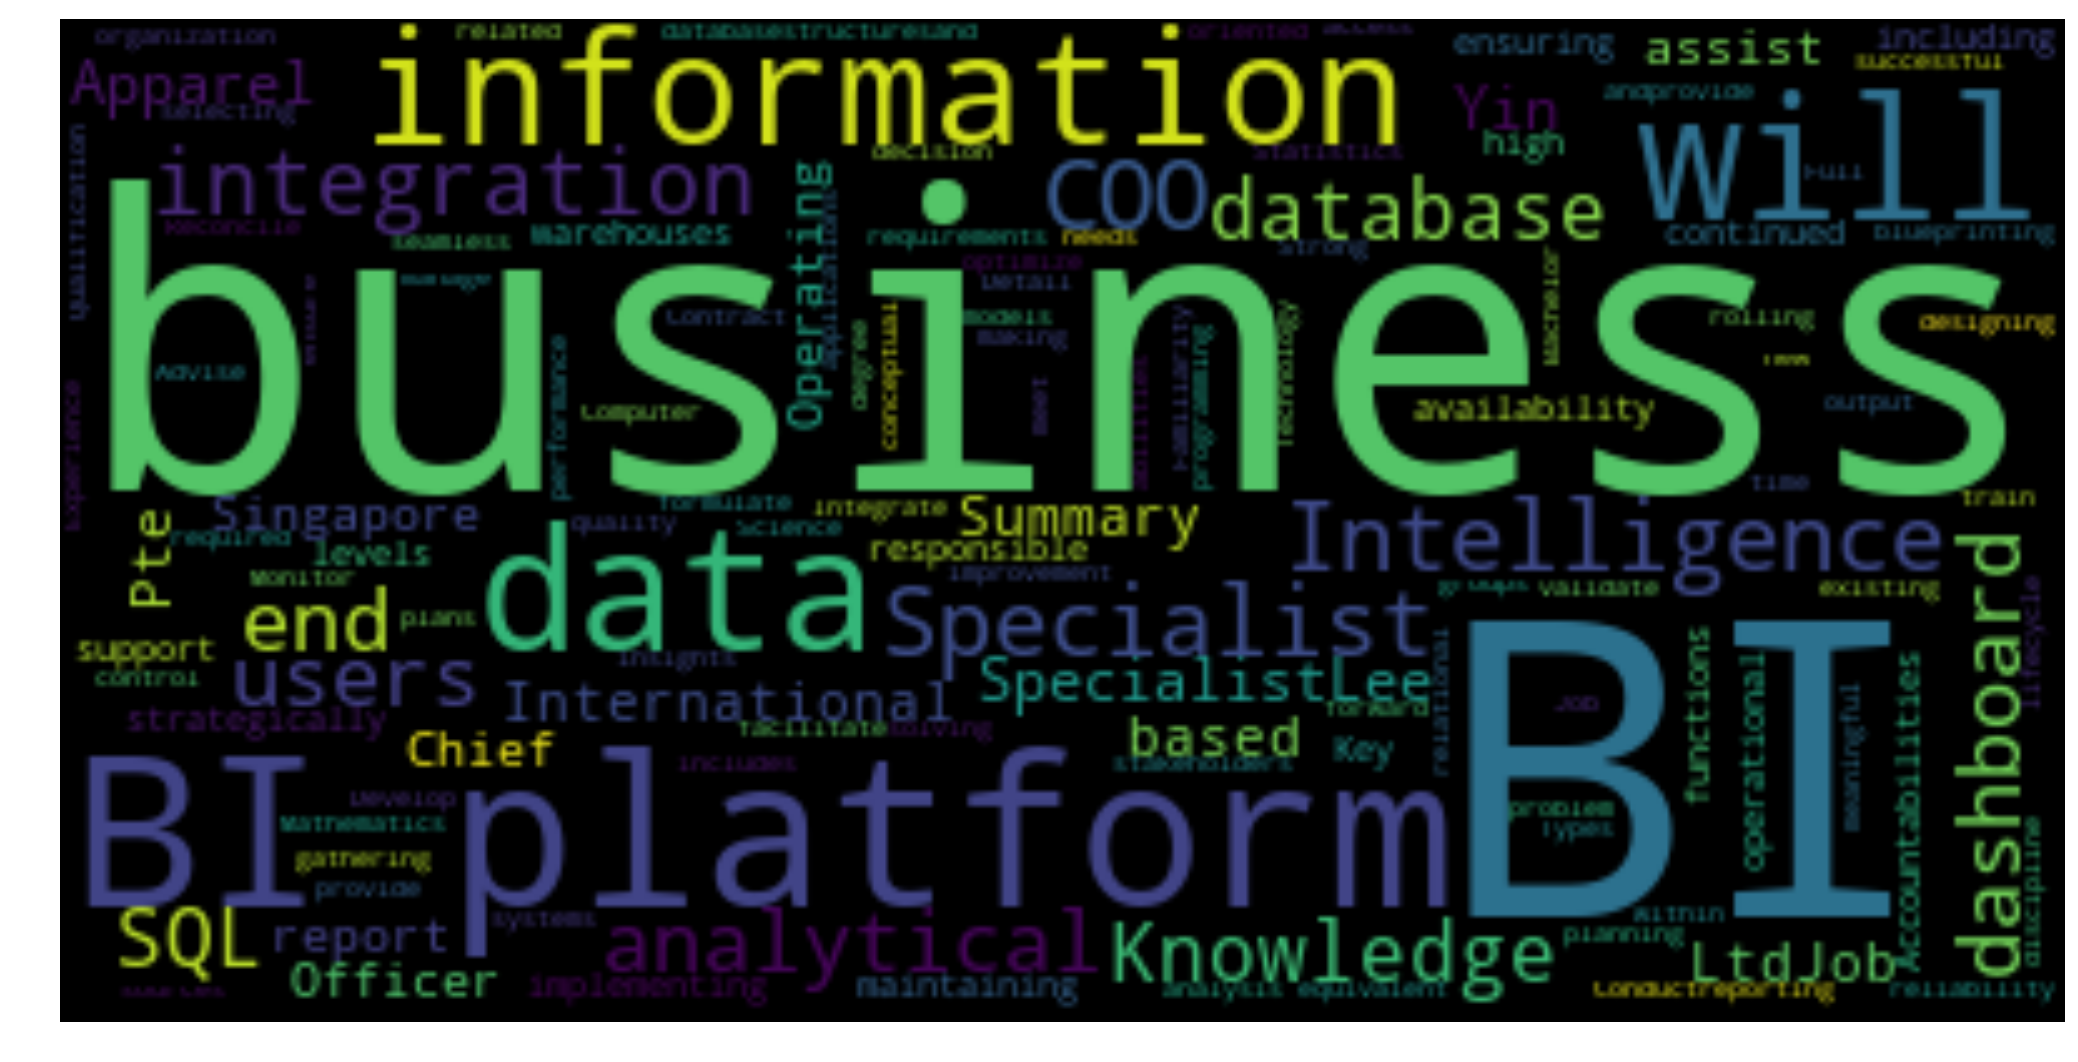

In [16]:
from wordcloud import WordCloud

text = ''
for item in train['All_Text']:
    text = ''.join(item)

wordcloud = WordCloud(background_color='black').generate(text)

plt.figure(figsize=(16, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Compare 2 kinds of models - Regression / SVM / RandomForest etc.
- title
- location
- dept

### Test, Validate, Score, Describe

## Using Sklearn Cvec Tfidf

In [17]:
train.reset_index(drop=True, inplace=True)
train.head()

,Job_Title,Job_Company,Job_Description,Job_Salary,Job_Salary_Ave,Job_Salary_Min,All_Text,Cat_Sal_Ave,Cat_Sal_Ave_Int
0,"VP, Business Data Analyst, Enterprise Data Str...",United Overseas Bank,"VP, Business Data Analyst, Enterprise Data St...",6000,5000,5000,"VP, Business Data Analyst, Enterprise Data Str...",Upper_Middle,3
1,Data Architect,Robert Walters (Singapore) Pte Ltd,An exciting Data Architect role has just bec...,15000,13333,13333,Data ArchitectRobert Walters (Singapore) Pte L...,Ultra,5
2,Data Analyst,Standard Chartered Bank Singapore,Leading the way in International Banking. We...,4500,4500,4500,Data AnalystStandard Chartered Bank Singapore ...,Upper_Middle,3
3,Data Architect,Standard Chartered Bank Singapore,Leading the way in International Banking. We...,4500,4500,4500,Data ArchitectStandard Chartered Bank Singapor...,Upper_Middle,3
4,Data Manager,Standard Chartered Bank Singapore,"This role reports to the project lead, Retai...",4500,4500,4500,Data ManagerStandard Chartered Bank Singapore ...,Upper_Middle,3


### Lemmatize over Stemmer
- Finding the "root" word in English makes more sense

In [18]:
from nltk.stem import WordNetLemmatizer
corpus = []
for i, j in enumerate(train['All_Text']):
    # what we DO NOT want to remove. Use the hat^ i.e do not remove a to z and A to Z. removed character will be a 'space'
    lst_words = re.sub('[^a-zA-Z]', ' ', train['All_Text'][i])
    #  lst_words = train['All_Text'][i]
    lst_words = lst_words.lower()
    lst_words = lst_words.split()

    ps = WordNetLemmatizer()
    # ps = PorterStemmer()
    lst_words = [word for word in lst_words if not word in set(stopwords)]
    lst_words = [ps.lemmatize(word) for word in lst_words if not word in set(
        stopwords)]  # porter stemmer removes the past tense from 'loved'
    lst_words_ = ' '.join(lst_words)

    corpus.append(lst_words_)  # the three dots disappeared

display(len(corpus))

1134

In [19]:
cvec = CountVectorizer()
# convert the documents into a document-term matrix
#  corpora = train['All_Text']
# tokenize and build vocab
cvec.fit(corpus)

# encode document
vector = cvec.transform(corpus)

list(cvec.vocabulary_)[:5]

['vp', 'business', 'data', 'analyst', 'enterprise']

In [20]:

# summarize
print(list(cvec.vocabulary_)[:5])  # tokenization here
print('\n')

# summarize encoded vector
print(vector.shape)
print('\n')

print(type(vector))
print('\n')

print(vector.toarray()[:5])
print('\n')

['vp', 'business', 'data', 'analyst', 'enterprise']


(1134, 12938)


<class 'scipy.sparse.csr.csr_matrix'>


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]




In [21]:
tokens = cvec.vocabulary_.keys()
X_train1 = pd.DataFrame(cvec.transform(corpus).todense(),
                        columns=tokens)
X_train1.shape

(1134, 12938)

### Which words appear the most?

In [22]:
# Which words appear the most?
word_counts = X_train1.sum(axis=0)
wc_30 = word_counts.sort_values(ascending=False).head(30)
wc_30.index

Index(['pertaining', 'cybersecurity', 'adaption', 'camtasia', 'worldquant',
       'accordinglygeneral', 'analystkeppel', 'favorite', 'unified', 'kuala',
       'found', 'restore', 'responsibilitiesey', 'fail', 'readiness',
       'representation', 'prioritisation', 'ceo', 'vrs', 'rolerole',
       'stringent', 'xpo', 'paktorplay', 'statistical', 'ubisoft', 'ocbcs',
       'turning', 'multitasking', 'paymentech', 'acca'],
      dtype='object')

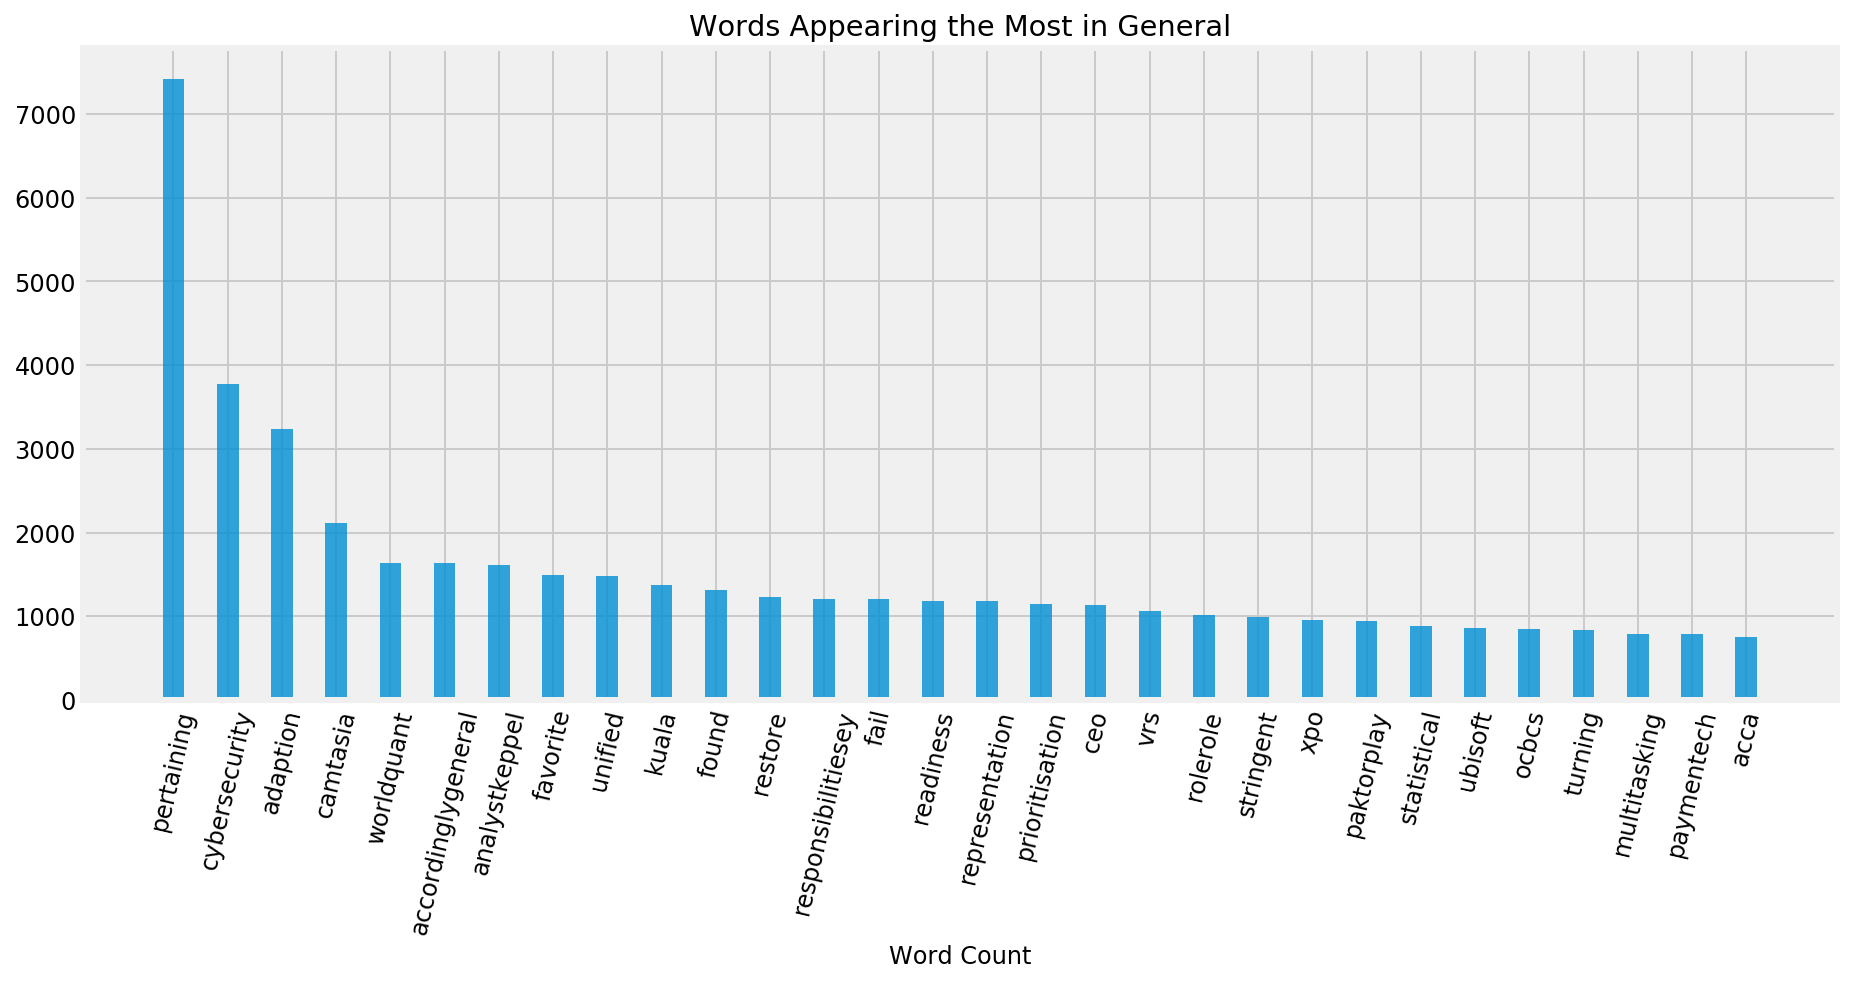

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 6)
plt.style.use('ggplot')
x_index = wc_30.index

bar_width = 0.4
opacity = 0.8
ax.bar(x_index, wc_30, bar_width, alpha=opacity)

plt.xticks(rotation=77, size=12)
plt.xlabel(s='Word Count')
plt.yticks(rotation=0, size=12)
plt.title('Words Appearing the Most in General')
plt.show()

In [24]:
names_of_col = list(train[['All_Text']].columns.values)
print(len(names_of_col))

test.reset_index(drop=True, inplace=True)
test.head()

1


,Job_Title,Job_Company,Job_Description,Job_Salary,Job_Salary_Ave,Job_Salary_Min,All_Text,Cat_Sal_Ave,Cat_Sal_Ave_Int
0,Enterprise Products - Index Data Quality Analy...,Bloomberg,Enterprise Products - Index Data Quality Ana...,6000,5000,5000,Enterprise Products - Index Data Quality Analy...,Upper_Middle,3
1,Security Operations Center (Fraud Analyst) Cyb...,"Wellington Management Company, LLP",Senior Software Engineer WELLINGTON MANAGEM...,6000,5000,5000,Security Operations Center (Fraud Analyst) Cyb...,Upper_Middle,3
2,"Assistant / Vice President, Portfolio & Regula...",J.P. Morgan,Application Support (Linux/ Web Infrastructu...,6000,5000,5000,"Assistant / Vice President, Portfolio & Regula...",Upper_Middle,3
3,Desk Quantitative analyst,Morgan McKinley Singapore,Cloud Engineer with a Global Bank Our clien...,6000,5000,5000,Desk Quantitative analystMorgan McKinley Singa...,Upper_Middle,3
4,Data Scientist,Institute for Infocomm Research,We are looking for strong candidates in the fi...,4500,4500,4500,Data ScientistInstitute for Infocomm ResearchW...,Upper_Middle,3


In [25]:
corpus_t = []
for i, j in enumerate(test['All_Text']):
    ps = PorterStemmer()
    #  lst_words = re.sub('[^a-zA-Z]',' ',test['All_Text'][i]) #  what we DO NOT want to remove. Use the hat^ i.e do not remove a to z and A to Z. removed character will be a 'space'
    lst_words = test['All_Text'][i]
    lst_words = lst_words.lower()
    lst_words = lst_words.split()

    lst_words = [word for word in lst_words if not word in set(stopwords)]
    lst_words = [ps.stem(word) for word in lst_words if not word in set(
        stopwords)]  # porter stemmer removes the past tense from 'loved'
    lst_words_ = ' '.join(lst_words)

    corpus_t.append(lst_words_)  # the three dots disappeared

display(len(corpus_t))

14

In [26]:
#  (corpus_t)

In [27]:
X_test1 = pd.DataFrame(cvec.transform(corpus_t).todense(),
                       columns=cvec.get_feature_names())
print(X_test1.shape, test['Cat_Sal_Ave'].shape)

(14, 12938) (14,)


### Base Log Reg Prediction

In [28]:
# Import and fit our logistic regression and test it too
logr = LogisticRegression()
logr.fit(X_train1, train['Cat_Sal_Ave'])
print(logr.score(X_test1, test['Cat_Sal_Ave']))

0.42857142857142855


## Using Spacy

In [29]:
import spacy
nlp = spacy.load('en')
#  stopwords = stopwords.words('english')

In [30]:
# Clean text before feeding it to spaCy
punctuations = string.punctuation

# Define function to cleanup text by removing personal pronouns, stopwords, and puncuation


def cleanup_text(docs, logging=False):
    texts = []
    counter = 1
    for doc in docs:
        if counter % 1000 == 0 and logging:
            print("Processed %d out of %d documents." % (counter, len(docs)))
        counter += 1
        doc = nlp(doc, disable=['parser', 'ner'])
        tokens = [tok.lemma_.lower().strip()
                  for tok in doc if tok.lemma_ != '-PRON-']
        tokens = [
            tok for tok in tokens if tok not in stopwords and tok not in punctuations]
        tokens = ' '.join(tokens)
        texts.append(tokens)
    return pd.Series(texts)

In [31]:
# Grab all text for Ultra Salary
text_ultra = [text for text in df[df['Cat_Sal_Ave'] == 'Ultra']['All_Text']]
text_u_mid = [text for text in df[df['Cat_Sal_Ave'] == 'Upper_Middle']['All_Text']]
text_entry = [text for text in df[df['Cat_Sal_Ave'] == 'Entry']['All_Text']]

In [43]:
# Clean up all text
ultra_clean = cleanup_text(text_ultra)
ultra_clean = ' '.join(ultra_clean).split()
# 's appears a lot in the text, so we get rid of it since it's not a word
ultra_clean = [word for word in ultra_clean if word != '\'s']

# Count all unique words
ultra_counts = Counter(ultra_clean)
ultra_counts

# ========  ========
# Clean up all text for Entry

u_mid_clean = cleanup_text(text_u_mid)
u_mid_clean = ' '.join(u_mid_clean).split()
# 's appears a lot in the text, so we get rid of it since it's not a word
u_mid_clean = [word for word in u_mid_clean if word != '\'s']

# Count all unique words
u_mid_counts = Counter(u_mid_clean)
u_mid_counts

# ========  ========
# Clean up all text for Entry

entry_clean = cleanup_text(text_entry)
entry_clean = ' '.join(entry_clean).split()
# 's appears a lot in the text, so we get rid of it since it's not a word
entry_clean = [word for word in entry_clean if word != '\'s']

# Count all unique words
entry_counts = Counter(entry_clean)

In [44]:
print(list(entry_counts.items())[:10])

[('datum', 358), ('scientistadvanced', 1), ('remanufacturing', 9), ('technology', 53), ('centre', 25), ('artc)about', 1), ('agency', 26), ('science', 74), ('research', 80), ('a*star)the', 1)]


### Commonly Used Words per Class

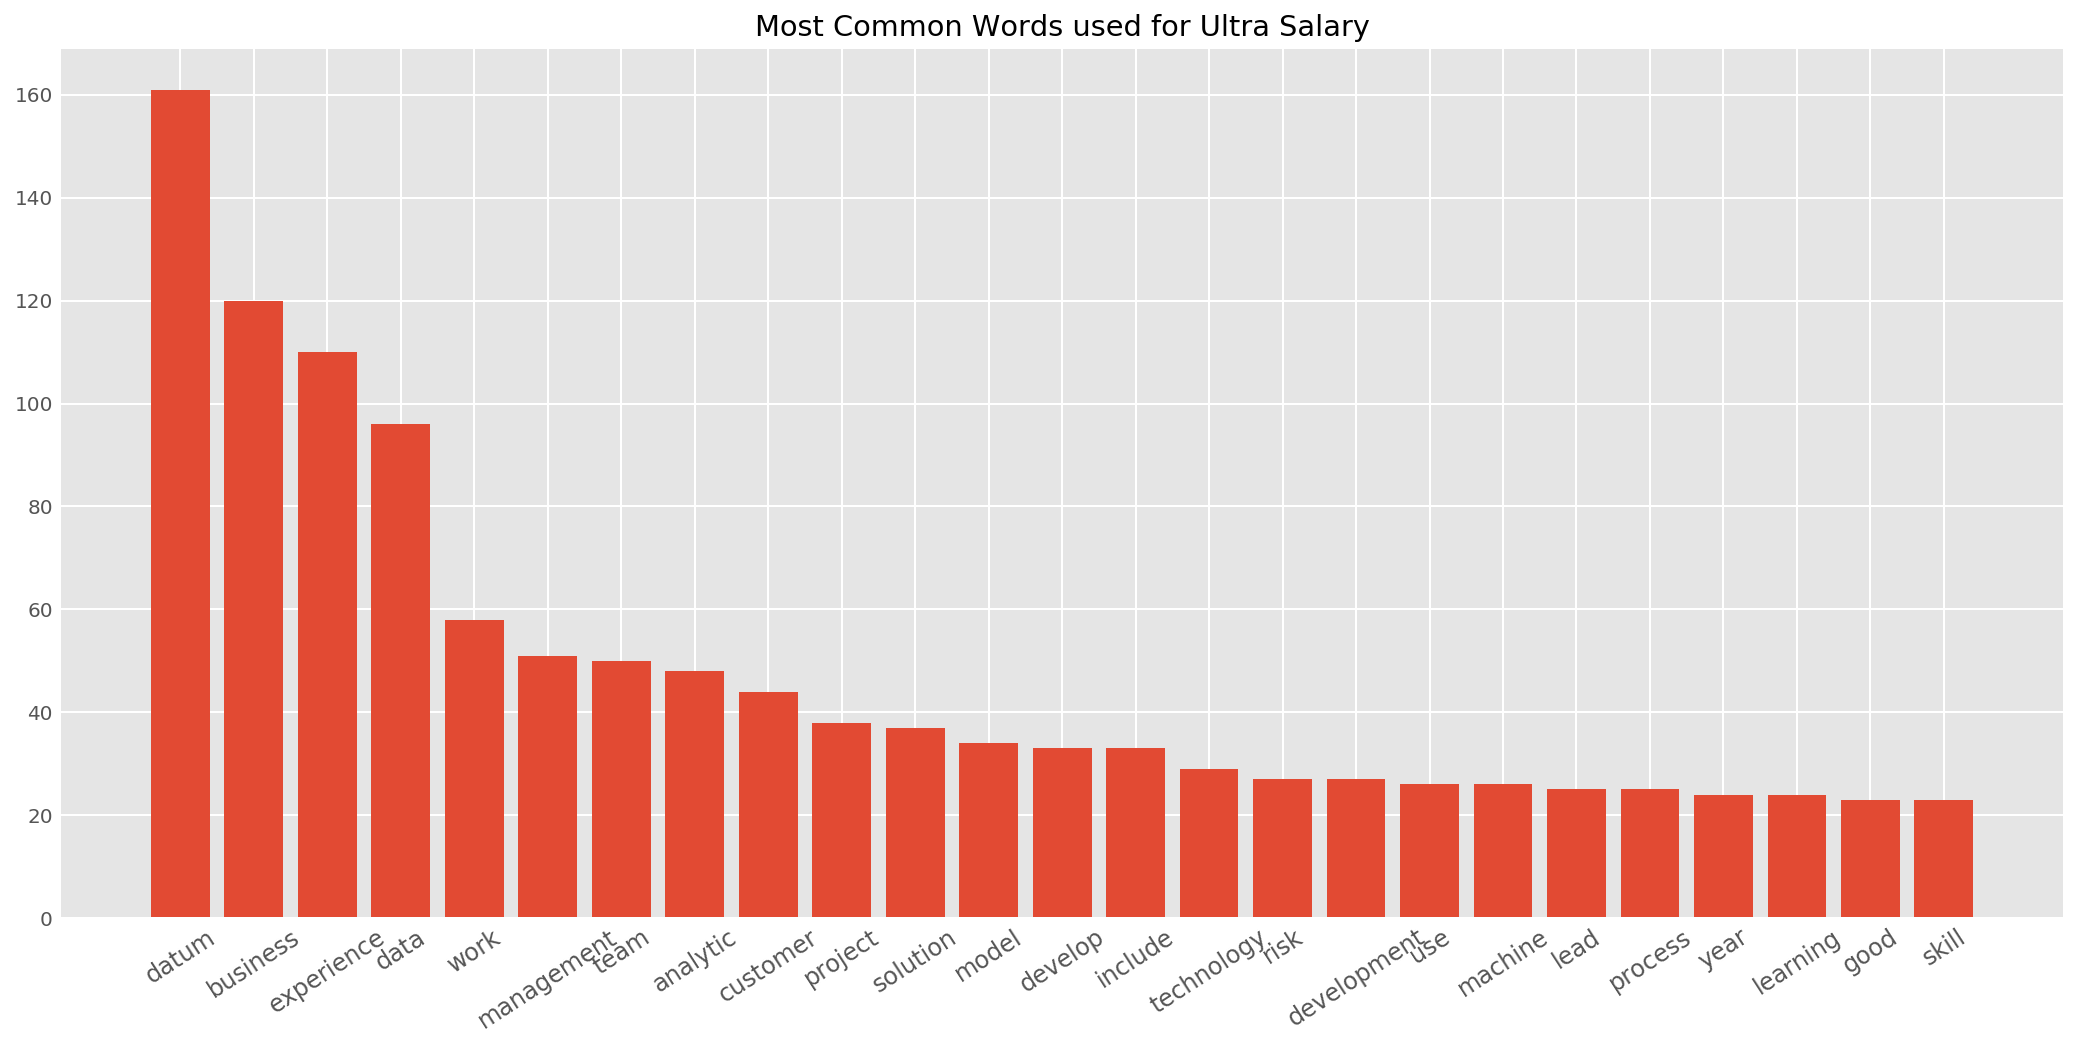

In [45]:
# Plot top 25 most frequently occuring words for Ultra
ultra_common_words = [word[0] for word in ultra_counts.most_common(25)]
ultra_common_counts = [word[1] for word in ultra_counts.most_common(25)]

fig, ax = plt.subplots(nrows=1)
fig.set_size_inches(16, 8)
plt.style.use('ggplot')
#  sns.set_style(style='whitegrid')
ax.bar(ultra_common_words, ultra_common_counts)
#sns.barplot(x=ultra_common_words, y=ultra_common_counts)
plt.title('Most Common Words used for Ultra Salary')
plt.xticks(rotation=33, size=12)
plt.show()

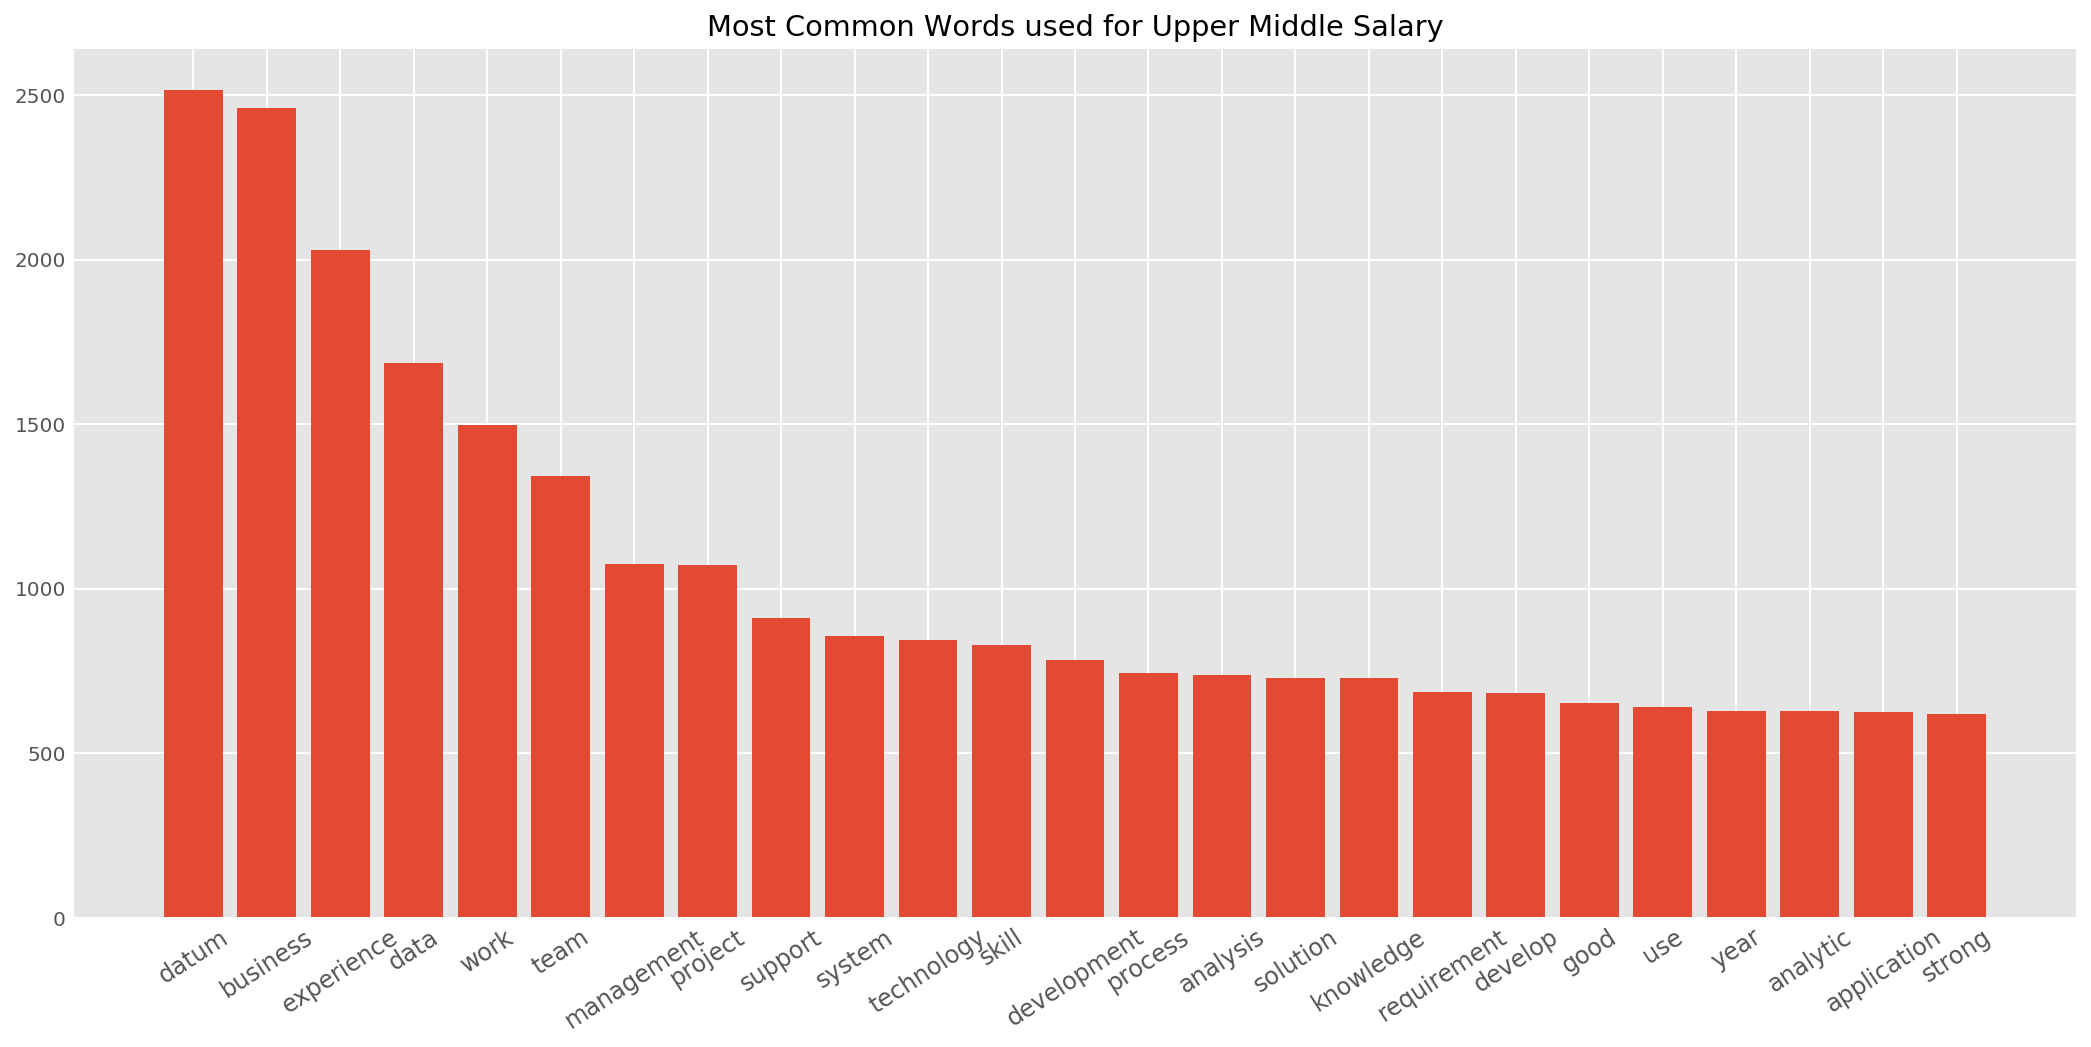

In [46]:
# Plot top 25 most frequently occuring words for Ultra
u_mid_common_words = [word[0] for word in u_mid_counts.most_common(25)]
u_mid_common_counts = [word[1] for word in u_mid_counts.most_common(25)]

fig, ax = plt.subplots(nrows=1)
fig.set_size_inches(16, 8)
plt.style.use('ggplot')
#  sns.set_style(style='whitegrid')
ax.bar(u_mid_common_words, u_mid_common_counts)
#sns.barplot(x=ultra_common_words, y=ultra_common_counts)
plt.title('Most Common Words used for Upper Middle Salary')
plt.xticks(rotation=33, size=12)
plt.show()

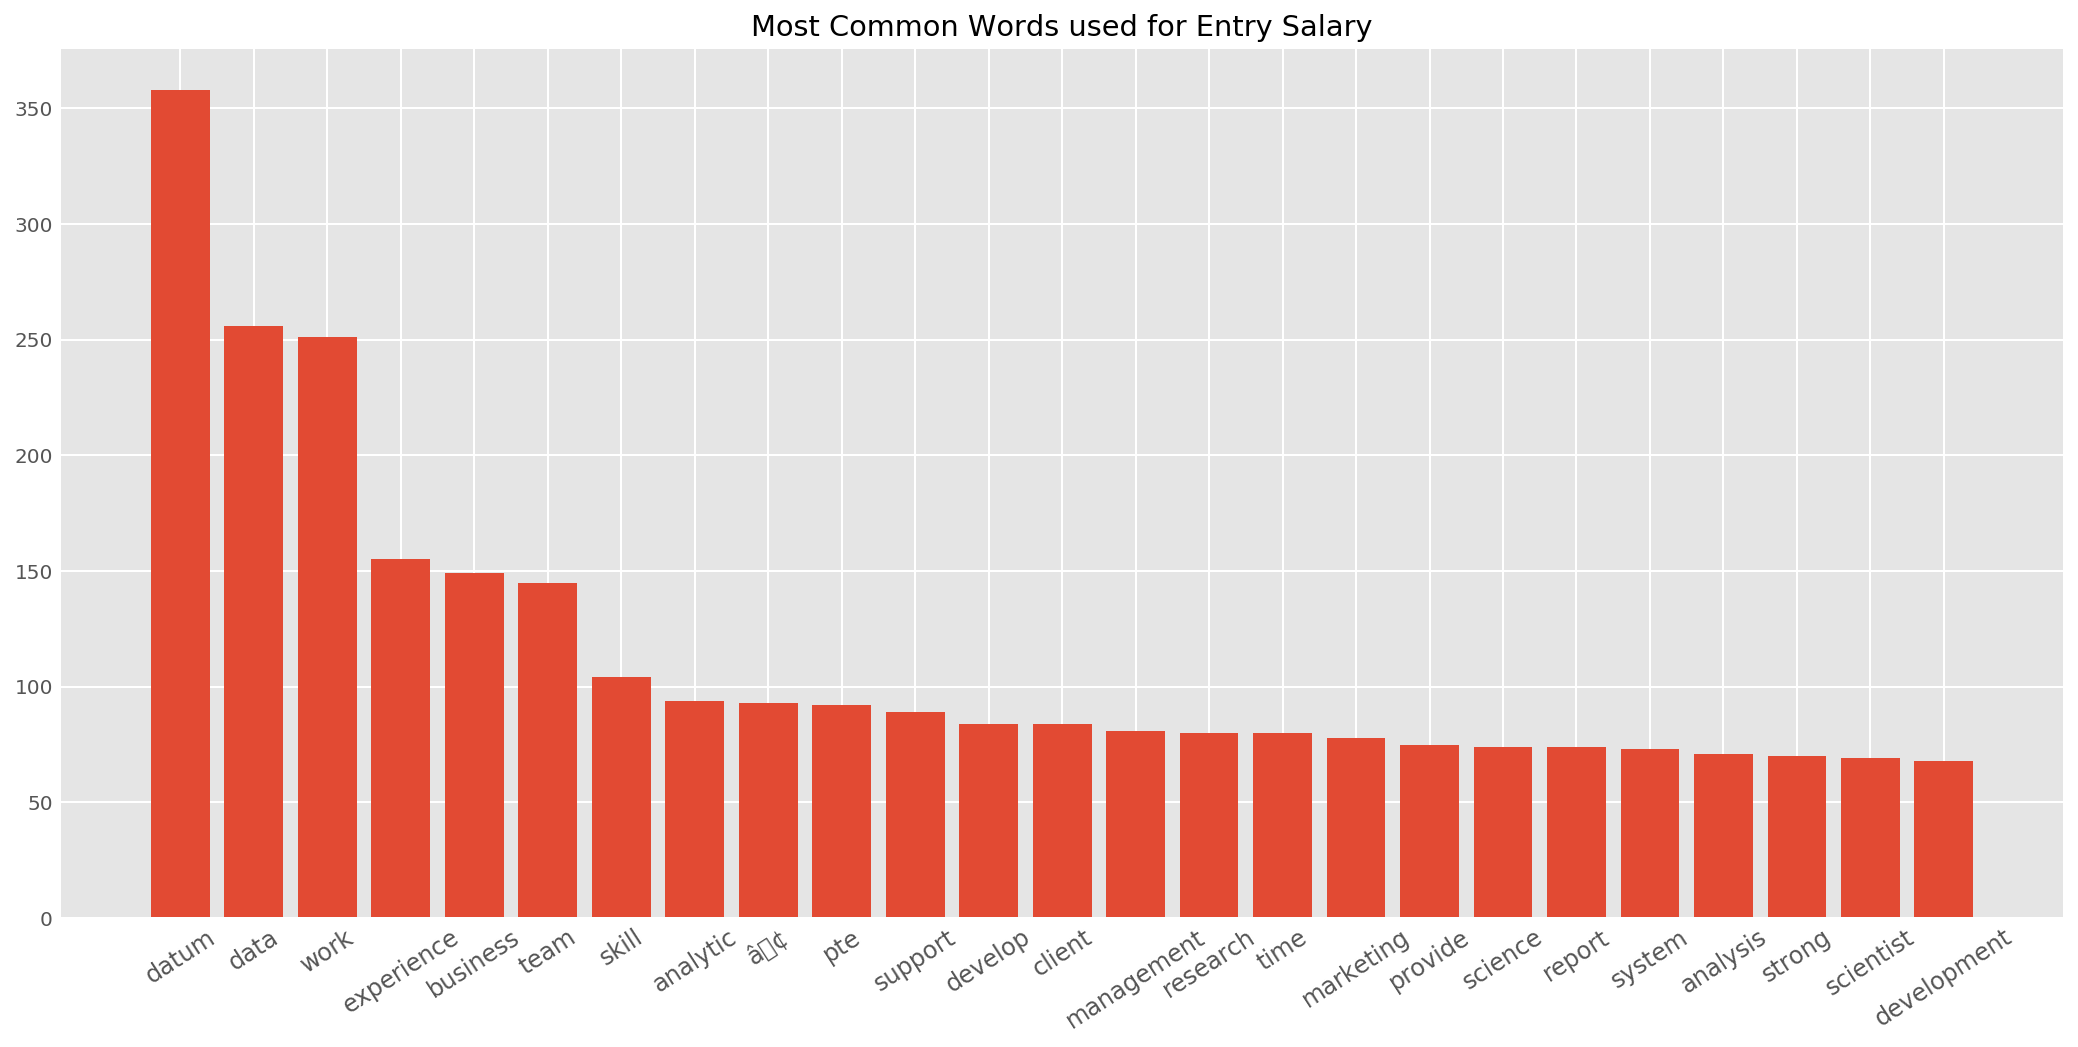

In [47]:
# Plot top 25 most frequently occuring words for Ultra
entry_common_words = [word[0] for word in entry_counts.most_common(25)]
entry_common_counts = [word[1] for word in entry_counts.most_common(25)]

fig, ax = plt.subplots(nrows=1)
fig.set_size_inches(16, 8)
plt.style.use('ggplot')
#  sns.set_style(style='whitegrid')
ax.bar(entry_common_words, entry_common_counts)
#sns.barplot(x=ultra_common_words, y=ultra_common_counts)
plt.title('Most Common Words used for Entry Salary')
plt.xticks(rotation=33, size=12)
plt.show()

### Cleanup text and make sure it retains original shape

In [48]:
# Cleanup text and make sure it retains original shape
print('Original training data shape: ', train['All_Text'].shape)
train_cleaned = cleanup_text(train['All_Text'], logging=True)
print('Cleaned up training data shape: ', train_cleaned.shape)

Original training data shape:  (1134,)
Processed 1000 out of 1134 documents.
Cleaned up training data shape:  (1134,)


In [49]:
# Cleanup text and make sure it retains original shape
print('Original testing data shape: ', test['All_Text'].shape)
test_cleaned = cleanup_text(test['All_Text'], logging=True)
print('Cleaned up testing data shape: ', test_cleaned.shape)
test_cleaned

Original testing data shape:  (14,)
Cleaned up testing data shape:  (14,)


0     enterprise products index data quality analyst...
1     security operations center fraud analyst cyber...
2     assistant vice president portfolio regulatory ...
3     desk quantitative analystmorgan mckinley singa...
4     data scientistinstitute infocomm researchwe lo...
5     business analystchandler macleod group pte ltd...
6     business analyststafflink services pte ltd rec...
7     business analystmiclyn express offshore pte lt...
8     business analysttalent trader group pte ltd re...
9     business intelligenceca search pte ltd recruit...
10    datum analystygp pte ltdapplication management...
11    data analystcapita pte ltd recruitment firm)mo...
12    data scientistinstitute infocomm researchthe p...
13    data analystclariant singapore pte ltd.role re...
dtype: object

In [50]:
# Parse documents and print some info
print('Parsing documents...')

start = time()

train_vec = []
for doc in nlp.pipe(train_cleaned, batch_size=500):
    if doc.has_vector:
        train_vec.append(doc.vector)
    # If doc doesn't have a vector, then fill it with zeros.
    else:
        train_vec.append(np.zeros((128,), dtype="float32"))

# train_vec = [doc.vector for doc in nlp.pipe(train_cleaned, batch_size=500)]
train_vec = np.array(train_vec)

end = time()
print('Total time passed parsing documents: {} seconds'.format(end - start))
print('Total number of documents parsed: {}'.format(len(train_vec)))
print('Number of words in first document: ', len(train['All_Text']))
print('Number of words in second document: ', len(train['All_Text']))
print('Size of vector embeddings: ', train_vec.shape[1])
print('Shape of vectors embeddings matrix: ', train_vec.shape)

Parsing documents...
Total time passed parsing documents: 46.73197317123413 seconds
Total number of documents parsed: 1134
Number of words in first document:  1134
Number of words in second document:  1134
Size of vector embeddings:  128
Shape of vectors embeddings matrix:  (1134, 128)


## Try Word2Vec -  measuring syntactic and semantic word similarities HEAD

In [51]:
# First combine train and test text into one dataframe to make parsing text easier
all_text = np.concatenate((train['All_Text'], test['All_Text']), axis=0)
all_text = pd.DataFrame(all_text, columns=['All_Text'])
print('Number of total text documents:', len(all_text))

Number of total text documents: 1148


### Define function to preprocess text for a word2vec model HEAD

In [52]:
# Define function to preprocess text for a word2vec model
def cleanup_text_word2vec(docs, logging=False):
    sentences = []
    counter = 1
    for doc in docs:
        if counter % 1000 == 0 and logging:
            print("Processed %d out of %d documents" % (counter, len(docs)))
        # Disable tagger so that lemma_ of personal pronouns (I, me, etc) don't getted marked as "-PRON-"
        doc = nlp(doc, disable=['tagger'])
        # Grab lemmatized form of words and make lowercase
        doc = " ".join([tok.lemma_.lower() for tok in doc])
        # Split into sentences based on punctuation
        doc = re.split("[\.?!;] ", doc)
        # Remove commas, periods, and other punctuation (mostly commas)
        doc = [re.sub("[\.,;:!?]", "", sent) for sent in doc]
        # Split into words
        doc = [sent.split() for sent in doc]
        sentences += doc
        counter += 1
    return sentences

#  ========  ========
train_cleaned_word2vec = cleanup_text_word2vec(
    all_text['All_Text'], logging=True)
print('Cleaned up training data size (i.e. number of sentences): ',
      len(train_cleaned_word2vec))

#  =======  =========

Processed 1000 out of 1148 documents
Cleaned up training data size (i.e. number of sentences):  13775


In [53]:
from gensim.models.word2vec import Word2Vec
# EDIT this
text_dim = 300

print("Training Word2Vec model...")
wordvec_model = Word2Vec(train_cleaned_word2vec,
                         size=text_dim, window=5, min_count=3, workers=4, sg=1)
print("Word2Vec model created.")
print("%d unique words represented by %d dimensional vectors" %
      (len(wordvec_model.wv.vocab), text_dim))

#  =======  ========

C:\Users\brian\AppData\Local\Continuum\anaconda3\envs\tensorflowanaconda\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


Training Word2Vec model...
Word2Vec model created.
5501 unique words represented by 300 dimensional vectors


### Test Functions and similarity

In [54]:
print(wordvec_model.wv.most_similar(positive=['scientist']))
print('\n')
print(wordvec_model.wv.most_similar(
    positive=['scientist', 'engineer'], negative=['analyst']))
#  print(wordvec_model.wv.most_similar_cosmul(positive=['woman', 'king'], negative=['man']))
#  print(wordvec_model.wv.doesnt_match("breakfast cereal dinner lunch".split()))
print('\n')
print(wordvec_model.wv.similarity('scientist', 'engineer'))
print('\n')
print(wordvec_model.wv.similarity('data', 'analyst'))

C:\Users\brian\AppData\Local\Continuum\anaconda3\envs\tensorflowanaconda\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('scientists', 0.8330981731414795), ('intern', 0.779803991317749), ('engineers', 0.7747910618782043), ('skilled', 0.7628765106201172), ('researchwe', 0.7598961591720581), ('join', 0.7598071098327637), ('analyst', 0.7533063888549805), ('chief', 0.7523044347763062), ('scientistinstitute', 0.7406401634216309), ('talented', 0.7405728101730347)]


[('novel', 0.6216166019439697), ('feature', 0.5932936072349548), ('machine', 0.573000431060791), ('ingestion', 0.5565784573554993), ('approach', 0.5494495630264282), ('cybersecurity', 0.5473625063896179), ('scientists', 0.5421737432479858), ('algorithm', 0.5393643379211426), ('devops', 0.5381802320480347), ('drug', 0.5361629128456116)]


0.62500215


0.60165334


### Define function to create word vectors given a cleaned piece of text.

In [55]:
def create_average_vec(doc):
    average = np.zeros((text_dim,), dtype='float32')
    num_words = 0.
    for word in doc.split():
        if word in wordvec_model.wv.vocab:
            average = np.add(average, wordvec_model[word])
            num_words += 1.
    if num_words != 0.:
        average = np.divide(average, num_words)
    return average

# ========  ========
len((test['All_Text'][3].split()))
# ========  ========
# test that the function works
len(create_average_vec(test['All_Text'][3]))

#  ========  ========
# Create word vectors
train_cleaned_vec = np.zeros(
    (train['All_Text'].shape[0], text_dim), dtype="float32")  # 1500+ x 300
for i in range(len(train_cleaned)):
    train_cleaned_vec[i] = create_average_vec(train_cleaned[i])

print("Train word vector shape:", train_cleaned_vec.shape)

#  =======  =======

C:\Users\brian\AppData\Local\Continuum\anaconda3\envs\tensorflowanaconda\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


Train word vector shape: (1134, 300)


### Hot Encoding HEAD



In [56]:
from sklearn.preprocessing import label_binarize

# Transform labels into one hot encoded format.
y_train_hotenc = label_binarize(train['Cat_Sal_Ave'], classes=[
                                'Entry', 'Middle', 'Upper_Middle', 'High', 'Ultra'])
print('y_train_hotenc shape: {}'.format(y_train_hotenc.shape))
print('y_train_hotenc samples:')
print(y_train_hotenc[:10])
print(y_train_hotenc.shape)

#  =======  =======
# Transform labels into one hot encoded format.
y_test_hotenc = label_binarize(test['Cat_Sal_Ave'], classes=[
    'Entry', 'Middle', 'Upper_Middle', 'High', 'Ultra'])
print('y_test_hotenc shape: {}'.format(y_test_hotenc.shape))
print('y_test_hotenc samples:')
print(y_test_hotenc[:10])

y_train_hotenc shape: (1134, 5)
y_train_hotenc samples:
[[0 0 1 0 0]
 [0 0 0 0 1]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]]
(1134, 5)
y_test_hotenc shape: (14, 5)
y_test_hotenc samples:
[[0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 0 0 1]]


## Enable Keras, from Word2Vec

In [57]:
# If using spaCy word vectors
# X_train, X_test, y_train, y_test = train_test_split(train_vec, y_train_ohe, test_size=0.2, random_state=21)
#  ========  =========
# If using Word2Vec word vectors
X_train, X_test, y_train, y_test = train_test_split(
    train_cleaned_vec, y_train_hotenc, test_size=0.2)

print('X_train size: {}'.format(X_train.shape))
print('X_test size: {}'.format(X_test.shape))
print('y_train size: {}'.format(y_train.shape))
print('y_test size: {}'.format(y_test.shape))

X_train size: (907, 300)
X_test size: (227, 300)
y_train size: (907, 5)
y_test size: (227, 5)


In [58]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Input, LSTM, Embedding, Bidirectional, Flatten
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D
from keras.optimizers import SGD


def build_model(architecture='mlp', txt_dim=300, y_class=3):
    """DOCSTRING: Choose from 'mlp', 'cnn' or 'lstm'\nChoose the size of the wordVec model dimension\nChoose the amount of the target classes\n"""
    model = Sequential()
    if architecture == 'mlp':
        # Densely Connected Neural Network (Multi-Layer Perceptron)
        model.add(Dense(512, activation='relu',
                        kernel_initializer='he_normal', input_dim=txt_dim))
        model.add(Dropout(0.2))
        model.add(Dense(512, activation='relu',
                        kernel_initializer='he_normal'))
        model.add(Dropout(0.2))
        model.add(Dense(512, activation='relu',
                        kernel_initializer='he_normal'))
        model.add(Dropout(0.2))
        model.add(Dense(512, activation='relu',
                        kernel_initializer='he_normal'))
        model.add(Dropout(0.2))
        model.add(Dense(y_class, activation='softmax'))
    elif architecture == 'cnn':
        # 1-D Convolutional Neural Network
        inputs = Input(shape=(txt_dim, 1))

        x = Conv1D(64, 3, strides=1, padding='same', activation='relu')(inputs)

        # Cuts the size of the output in half, maxing over every 2 inputs
        x = MaxPooling1D(pool_size=2)(x)
        x = Conv1D(128, 3, strides=1, padding='same', activation='relu')(x)
        x = GlobalMaxPooling1D()(x)
        outputs = Dense(y_class, activation='softmax')(x)

        model = Model(inputs=inputs, outputs=outputs, name='CNN')
    elif architecture == 'lstm':
        # LSTM network
        inputs = Input(shape=(txt_dim, 1))

        x = Bidirectional(LSTM(64, return_sequences=True),
                          merge_mode='concat')(inputs)
        x = Dropout(0.2)(x)
        x = Flatten()(x)
        outputs = Dense(y_class, activation='softmax')(x)

        model = Model(inputs=inputs, outputs=outputs, name='LSTM')
    else:
        print('Error: Model type not found.')
    return model

Using TensorFlow backend.


In [59]:
# Define keras model
# Using MLP in kernel for speed

#  ========  ========
# SELECT THE MODEL BELOW
model = build_model('mlp', 300, 5)
#  ========  ========

# If the model is a CNN then expand the dimensions of the training data
if model.name == "CNN" or model.name == "LSTM":
    X_train = np.expand_dims(X_train, axis=2)
    X_test = np.expand_dims(X_test, axis=2)
    print('Text train shape: ', X_test.shape)
    print('Text test shape: ', X_test.shape)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               154112    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
__________

### Actual model fitting from the MLP keras for GradDesc

In [60]:
# Compile the model
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['acc'])

# Define number of epochs
epochs = 50
# Fit the model to the training data
estimator = model.fit(X_train, y_train,
                      validation_split=0.2,
                      epochs=epochs, batch_size=128, verbose=1)

Train on 725 samples, validate on 182 samples
Epoch 1/50
725/725 [==============================] - ETA: 7s - loss: 1.5221 - acc: 0.257 - 2s 2ms/step - loss: 1.3877 - acc: 0.4938 - val_loss: 1.1940 - val_acc: 0.5824
Epoch 2/50
725/725 [==============================] - ETA: 0s - loss: 1.1876 - acc: 0.601 - 0s 43us/step - loss: 1.1952 - acc: 0.5724 - val_loss: 1.1657 - val_acc: 0.5824
Epoch 3/50
725/725 [==============================] - ETA: 0s - loss: 1.1802 - acc: 0.593 - 0s 43us/step - loss: 1.1630 - acc: 0.5724 - val_loss: 1.1709 - val_acc: 0.5824
Epoch 4/50
725/725 [==============================] - ETA: 0s - loss: 1.1823 - acc: 0.593 - 0s 44us/step - loss: 1.1666 - acc: 0.5697 - val_loss: 1.1621 - val_acc: 0.5824
Epoch 5/50
725/725 [==============================] - ETA: 0s - loss: 1.2455 - acc: 0.523 - 0s 41us/step - loss: 1.1551 - acc: 0.5724 - val_loss: 1.1576 - val_acc: 0.5824
Epoch 6/50
725/725 [==============================] - ETA: 0s - loss: 1.1560 - acc: 0.585 - 0s 43us/

725/725 [==============================] - ETA: 0s - loss: 1.0668 - acc: 0.562 - 0s 43us/step - loss: 1.0821 - acc: 0.5752 - val_loss: 1.0867 - val_acc: 0.5824
Epoch 49/50
725/725 [==============================] - ETA: 0s - loss: 1.0183 - acc: 0.625 - 0s 44us/step - loss: 1.0852 - acc: 0.5752 - val_loss: 1.0823 - val_acc: 0.5824
Epoch 50/50
725/725 [==============================] - ETA: 0s - loss: 1.0124 - acc: 0.664 - 0s 41us/step - loss: 1.0832 - acc: 0.5724 - val_loss: 1.0814 - val_acc: 0.5824


In [61]:
print("Training accuracy: %.2f%% / Validation accuracy: %.2f%%" %
      (100*estimator.history['acc'][-1], 100*estimator.history['val_acc'][-1]))

Training accuracy: 57.24% / Validation accuracy: 58.24%


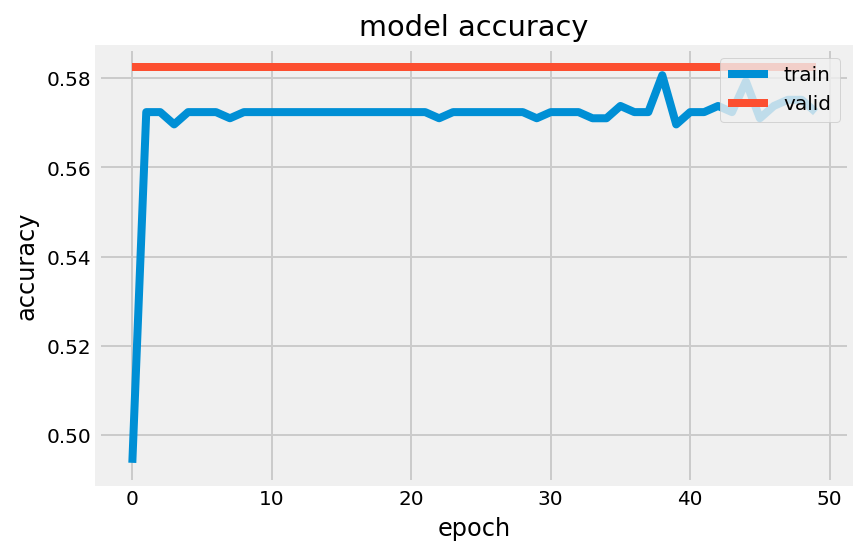

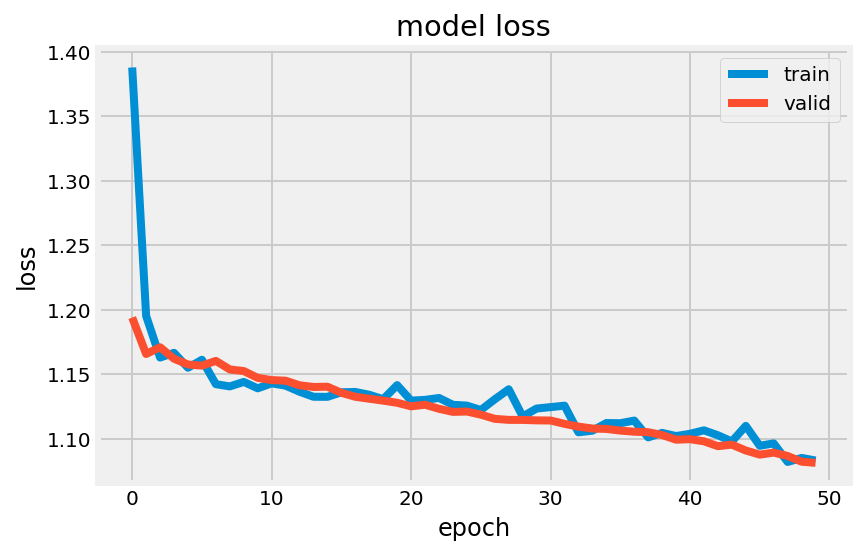

In [62]:
# Plot model accuracy over epochs
# Reset seaborn settings to get rid of black background
sns.reset_orig()
plt.plot(estimator.history['acc'])
plt.plot(estimator.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

# Plot model loss over epochs
plt.plot(estimator.history['loss'])
plt.plot(estimator.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

In [63]:
# Make predictions
predicted_prob = model.predict(X_test)
print(predicted_prob.shape)

# Report log loss and score
loss_sk = log_loss(y_test, predicted_prob)
print('Log loss is: {}'.format(loss_sk))

(227, 5)
Log loss is: 1.021461426949186


## QUESTION 1: Predicting Salary classes
Create and compare at least two models for each section**. One of the two models should be a decision tree or ensemble model. The other can be a classifier or regression of your choosing (e.g. Ridge, logistic regression, KNN, SVM, etc).

Predict Salary with Classification, maybe with these models
- NLP
- Unsupervised learning and dimensionality reduction techniques (PCA, clustering)
- Ensemble methods and decision tree models
- SVM models

### Reset X train y train etc.

In [64]:
# len(train['Cat_Sal_Ave'])
print(len(train['All_Text']),len(train_cleaned))

1134 1134


In [65]:
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer

class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()

    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]

In [66]:
# If using spaCy word vectors
# X_train, X_test, y_train, y_test = train_test_split(train_vec, y_train_ohe, test_size=0.2, random_state=21)
#  ========  =========
# If using Word2Vec word vectors
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    train_cleaned, train['Cat_Sal_Ave'], test_size=0.2)

print('X_train2 size: {}'.format(X_train.shape))
print('X_test2 size: {}'.format(X_test.shape))
print('y_train2 size: {}'.format(y_train.shape))
print('y_test2 size: {}'.format(y_test.shape))

X_train2 size: (907, 300)
X_test2 size: (227, 300)
y_train2 size: (907, 5)
y_test2 size: (227, 5)


In [67]:
"""### Deal with imbal data
sm = SMOTE(random_state=12, ratio = 1.0)
X_train2, y_train2 = sm.fit_sample(X_train2, y_train2)"""

'### Deal with imbal data\nsm = SMOTE(random_state=12, ratio = 1.0)\nX_train2, y_train2 = sm.fit_sample(X_train2, y_train2)'

### Category <100k, Text Data, Classification

In [68]:
# Break

### Pipeline with TFIDf Vect + LinSVC

In [69]:
tf_linsvc = Pipeline(steps=[('tfifd', TfidfVectorizer(sublinear_tf=True,
                                                      max_df=1.0,
#                                                      max_features=1000
                                                      )),
                            ('tfidftrans', TfidfTransformer(use_idf=False)),
                            ('LinSVC', svm.LinearSVC())
                           ])

tf_linsvc.fit(X_train2, y_train2)
y_pred = tf_linsvc.predict(X_test2)
tf_linsvc_sc = accuracy_score(y_test2, y_pred) 
print(tf_linsvc_sc)
print("Number of features:", len(tf_linsvc.steps[0][1].get_feature_names()))

0.7577092511013216
Number of features: 12295


### CVEC + LinearSVC

In [70]:
cvec_linsvc = Pipeline(steps=[('cvec', CountVectorizer(ngram_range=(1, 2),max_df=1.0)),
                           ('tfidftrans', TfidfTransformer(use_idf=False)),
                           ('SVC', svm.LinearSVC())
                          ])

cvec_linsvc.fit(X_train2, y_train2)
y_pred = cvec_linsvc.predict(X_test2)
cvec_linsvc.score(X_test2, y_test2)
cvec_linsvc_sc = accuracy_score(y_test2, y_pred)
print(cvec_linsvc_sc)
print("Number of features:", len(cvec_linsvc.steps[0][1].get_feature_names()))

0.748898678414097
Number of features: 99872


### TF LogReg

In [71]:
tf_logreg = Pipeline(steps=[('tfifd', TfidfVectorizer(sublinear_tf=True,
                                                      max_df=1.0,
#                                                      max_features=1000
                                                      )),
                            ('tfidftrans', TfidfTransformer(use_idf=False)),
                            ('logreg', LogisticRegression())])
tf_logreg.fit(X_train2, y_train2)
y_pred = tf_logreg.predict(X_test2)
tf_logreg_sc = accuracy_score(y_test2, y_pred)
print(tf_logreg_sc)
print("Number of features:", len(tf_logreg.steps[0][1].get_feature_names()))

0.7004405286343612
Number of features: 12295


In [72]:
tf_svc = Pipeline(steps=[('tfifd', TfidfVectorizer(sublinear_tf=True,
                                                   max_df=1.0,
                                                   #                                                   max_features=1000
                                                   )),
                         ('tfidftrans', TfidfTransformer(use_idf=False)),
                         ('SVC', svm.SVC())])
tf_svc.fit(X_train2, y_train2)
y_pred = tf_svc.predict(X_test2)
tf_svc_sc =accuracy_score(y_test2, y_pred)
print(tf_svc_sc)
print("Number of features:", len(tf_svc.steps[0][1].get_feature_names()))

0.6475770925110133
Number of features: 12295


### CVEClinSVC + GRID

In [73]:
# Define a pipeline combining a text feature extractor with a simple classifier
import logging
from time import time

pipeline = Pipeline(steps=[('cvec', CountVectorizer()),
                           # ngram_range=(1, 2), max_df=0.5, max_features=None
                           ('tfidf', TfidfTransformer(use_idf=False)),
                           ('linsvc', svm.LinearSVC())])

# uncommenting more parameters will give better exploring power but will
# increase processing time in a combinatorial way
parameters = {
    'cvec__max_df': (0.5, 0.75, 1.0),
    'cvec__max_features': (None, 5000, 10000, 50000),
    'cvec__ngram_range': ((1, 1), (1, 2),(1,3)),
    # unigrams or bigrams or trigrams
    'tfidf__use_idf': (True, False),
    'tfidf__norm': ('l1', 'l2'),
    # 'linsvc__penalty':('l1','l2')
}

# if __name__ == "__main__":
# multiprocessing requires the fork to happen in a __main__ protected block
# find the best parameters for both the feature extraction and the classifier

grid_search = GridSearchCV(pipeline, parameters, cv=3, n_jobs=-1, verbose=2)

print("Performing grid search...")
print("pipeline:", [name for name, _ in pipeline.steps])
print("parameters:")

pp2(parameters)
t0 = time()

grid_search.fit(X_train2, y_train2)

# ======== use named steps to Reaccess the pipeline stuff  ========

vect = grid_search.best_estimator_.named_steps['cvec']
classifier = grid_search.best_estimator_.named_steps['linsvc']

y_pred = grid_search.predict(X_test2)

print("done in %0.3fs" % (time() - t0))
print()
print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")

best_parameters = grid_search.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
pipeline: ['cvec', 'tfidf', 'linsvc']
parameters:
{'cvec__max_df': (0.5, 0.75, 1.0),
 'cvec__max_features': (None, 5000, 10000, 50000),
 'cvec__ngram_range': ((1, 1), (1, 2), (1, 3)),
 'tfidf__norm': ('l1', 'l2'),
 'tfidf__use_idf': (True, False)}
Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   28.0s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:  1.2min finished


done in 76.000s

Best score: 0.666
Best parameters set:
	cvec__max_df: 1.0
	cvec__max_features: None
	cvec__ngram_range: (1, 3)
	tfidf__norm: 'l2'
	tfidf__use_idf: False


In [74]:
clf_coefs = pd.DataFrame({'Word_Variable':vect.get_feature_names(),
                            'Coef':classifier.coef_[3]}) #  best_clf.coef_

clf_coefs.sort_values('Coef', inplace=True, ascending=False)
clf_coefs.head(10)

,Word_Variable,Coef
162076,quantitative,0.521463
98730,include,0.495343
46952,customer,0.483201
175619,risk,0.441506
117228,look,0.422528
119704,manage,0.389660
115126,licence,0.381110
17020,architect,0.353275
76708,experience,0.352175
174851,reuters,0.346625


In [75]:
linsvc_sc = accuracy_score(y_test2, y_pred)
print(linsvc_sc)
print()
print(classification_report(y_test2, y_pred))
print()
print(confusion_matrix(y_test2, y_pred))

0.7400881057268722

              precision    recall  f1-score   support

       Entry       0.85      0.61      0.71        18
        High       0.40      0.17      0.24        12
      Middle       0.59      0.40      0.48        47
       Ultra       0.00      0.00      0.00         3
Upper_Middle       0.77      0.93      0.84       147

 avg / total       0.71      0.74      0.71       227


[[ 11   0   2   0   5]
 [  0   2   3   0   7]
 [  1   1  19   0  26]
 [  0   1   0   0   2]
 [  1   1   8   1 136]]


### SGDClassifier + GRID

In [76]:
# Define a pipeline combining a text feature extractor with a simple classifier
import logging
from time import time
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV


pipeline = Pipeline(steps=[('cvec', CountVectorizer()),
                           # ngram_range=(1, 2), max_df=0.5, max_features=None
                           ('tfidf', TfidfTransformer()),
                           ('SGDc', SGDClassifier())])

# uncommenting more parameters will give better exploring power but will
# increase processing time in a combinatorial way
parameters = {
    'cvec__max_df': (0.5, 0.75, 1.0),
    # 'cvec__max_features': (None, 5000, 10000, 50000),
    'cvec__ngram_range': ((1, 1), (1, 2)),  # unigrams or bigrams
    # 'tfidf__use_idf': (True, False),
    # 'tfidf__norm': ('l1', 'l2'),
    'SGDc__alpha': (0.00001, 0.000001),
    'SGDc__penalty': ('l2', 'elasticnet'),
    # 'SGDc__n_iter': (10, 50, 80),
}

# if __name__ == "__main__":
# multiprocessing requires the fork to happen in a __main__ protected block
# find the best parameters for both the feature extraction and the classifier

grid_search = GridSearchCV(pipeline, parameters, cv=3, n_jobs=-1, verbose=2)

print("Performing grid search...")
print("pipeline:", [name for name, _ in pipeline.steps])
print("parameters:")

pp2(parameters)
t0 = time()

grid_search.fit(X_train2, y_train2)

# ======== use named steps to Reaccess the pipeline stuff  ========

vect = grid_search.best_estimator_.named_steps['cvec']
classifier = grid_search.best_estimator_.named_steps['SGDc']

y_pred = grid_search.predict(X_test2)

print("done in %0.3fs" % (time() - t0))
print()
print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")

best_parameters = grid_search.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
pipeline: ['cvec', 'tfidf', 'SGDc']
parameters:
{'SGDc__alpha': (1e-05, 1e-06),
 'SGDc__penalty': ('l2', 'elasticnet'),
 'cvec__max_df': (0.5, 0.75, 1.0),
 'cvec__ngram_range': ((1, 1), (1, 2))}
Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:   16.5s finished
C:\Users\brian\AppData\Local\Continuum\anaconda3\envs\tensorflowanaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


done in 17.536s

Best score: 0.662
Best parameters set:
	SGDc__alpha: 1e-06
	SGDc__penalty: 'elasticnet'
	cvec__max_df: 0.75
	cvec__ngram_range: (1, 2)


### Table of Best coefs for a Word

In [77]:
clf_coefs = pd.DataFrame({'Word_Variable':vect.get_feature_names(),
                            'Coef':classifier.coef_[3]}) #  best_clf.coef_

clf_coefs.sort_values('Coef', inplace=True, ascending=False)
clf_coefs.head(10)

,Word_Variable,Coef
79446,scientistcompany,10.196740
79447,scientistcompany undisclosedroles,10.196740
22102,data scientistcompany,10.015033
77012,reuters,9.678610
94584,undisclosedroles responsibilities,9.381701
49336,lead senior,9.332771
53717,market,8.957906
6689,anomality,8.751253
6690,anomality detection,8.751253
53749,market datum,7.732383


In [78]:
SGDc_sc = accuracy_score(y_test2, y_pred)
print(SGDc_sc)
print()
print(classification_report(y_test2, y_pred))
print()
print(confusion_matrix(y_test2, y_pred))

0.7048458149779736

              precision    recall  f1-score   support

       Entry       0.67      0.78      0.72        18
        High       0.22      0.17      0.19        12
      Middle       0.50      0.45      0.47        47
       Ultra       0.00      0.00      0.00         3
Upper_Middle       0.80      0.84      0.82       147

 avg / total       0.69      0.70      0.70       227


[[ 14   0   2   0   2]
 [  1   2   4   0   5]
 [  2   3  21   0  21]
 [  0   0   1   0   2]
 [  4   4  14   2 123]]


### TF + multiNB + GRID

In [79]:
# NAIVE BAYES
# Define a pipeline combining a text feature extractor with a simple classifier
import logging
from time import time
from sklearn.naive_bayes import MultinomialNB


pipeline = Pipeline(steps=[('tfidfV', TfidfVectorizer()),
                           # ngram_range=(1, 2), max_df=0.5, max_features=None
                           ('tfidf', TfidfTransformer()),
                           ('mnb', MultinomialNB())])

# uncommenting more parameters will give better exploring power but will
# increase processing time in a combinatorial way
parameters = {
    'tfidfV__max_df': (0.5, 0.75, 1.0),
    #'cvec__max_df': (0.5, 0.75, 1.0),
    # 'cvec__max_features': (None, 5000, 10000, 50000),
    'tfidfV__ngram_range': ((1, 1), (1, 2)),  # unigrams or bigrams
    #'cvec__ngram_range': ((1, 1), (1, 2)),  # unigrams or bigrams
    'tfidf__use_idf': (True, False),
    'tfidf__norm': ('l1', 'l2'),
    'mnb__alpha': (0.5, 0.75, 1.0),

}

# if __name__ == "__main__":
# multiprocessing requires the fork to happen in a __main__ protected block
# find the best parameters for both the feature extraction and the classifier

grid_search = GridSearchCV(pipeline, parameters, cv=3, n_jobs=-1, verbose=2)

print("Performing grid search...")
print("pipeline:", [name for name, _ in pipeline.steps])
print("parameters:")

pp2(parameters)
t0 = time()

grid_search.fit(X_train2, y_train2)

# ======== use named steps to Reaccess the pipeline stuff  ========

vect = grid_search.best_estimator_.named_steps['tfidfV']
classifier = grid_search.best_estimator_.named_steps['mnb']

y_pred = grid_search.predict(X_test2)

print("done in %0.3fs" % (time() - t0))
print()
print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")

best_parameters = grid_search.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
pipeline: ['tfidfV', 'tfidf', 'mnb']
parameters:
{'mnb__alpha': (0.5, 0.75, 1.0),
 'tfidfV__max_df': (0.5, 0.75, 1.0),
 'tfidfV__ngram_range': ((1, 1), (1, 2)),
 'tfidf__norm': ('l1', 'l2'),
 'tfidf__use_idf': (True, False)}
Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   22.5s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:   31.1s finished


done in 32.026s

Best score: 0.623
Best parameters set:
	mnb__alpha: 0.5
	tfidfV__max_df: 0.5
	tfidfV__ngram_range: (1, 2)
	tfidf__norm: 'l2'
	tfidf__use_idf: True


In [80]:
clf_coefs = pd.DataFrame({'Word_Variable':vect.get_feature_names(),
                            'Coef':classifier.coef_[3]}) #  best_clf.coef_

clf_coefs.sort_values('Coef', inplace=True, ascending=False)
clf_coefs.head(10)

,Word_Variable,Coef
41595,huxley,-10.946816
58681,nguyen,-10.993649
77004,reuters,-11.003082
71219,quantitative,-11.057078
91704,thomson,-11.088745
91705,thomson reuters,-11.088745
77378,risk,-11.099814
86192,sthree pte,-11.103608
70335,pte limited,-11.103608
86191,sthree,-11.103608


In [81]:
mnb_sc = accuracy_score(y_test2, y_pred)
print(mnb_sc)
print()
print(classification_report(y_test2, y_pred))
print()
print(confusion_matrix(y_test2, y_pred))

0.7180616740088106



C:\Users\brian\AppData\Local\Continuum\anaconda3\envs\tensorflowanaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

       Entry       1.00      0.44      0.62        18
        High       0.00      0.00      0.00        12
      Middle       0.58      0.23      0.33        47
       Ultra       0.00      0.00      0.00         3
Upper_Middle       0.72      0.98      0.83       147

 avg / total       0.67      0.72      0.66       227


[[  8   0   2   0   8]
 [  0   0   3   0   9]
 [  0   0  11   0  36]
 [  0   0   0   0   3]
 [  0   0   3   0 144]]


### Random Forest

In [82]:
# Classifier Model Code
from sklearn.ensemble import RandomForestClassifier
rfc_pl = Pipeline ( [('tfidfV',TfidfVectorizer()),
                     ('tfidfT',TfidfTransformer()),
                     ('rfc',RandomForestClassifier(n_estimators=10,max_depth=25, criterion="entropy", random_state=0)
)])

rfc_pl.fit(X_train2, y_train2)

# ======== use named steps to Reaccess the pipeline stuff  ========

vect = rfc_pl.named_steps['tfidfV']
classifier = rfc_pl.named_steps['rfc']

y_pred = rfc_pl.predict(X_test2)
rfc_sc = accuracy_score(y_test2, y_pred) 
print(rfc_sc)
print("Number of features:", len(rfc_pl.steps[0][1].get_feature_names()))

0.7136563876651982
Number of features: 12295


### Table of Scores

In [83]:
list_models = ['tf_LinSVC','cvec_LinSVC','tf_logreg','tf_SVC','cvec_linsvc_sc_GRID','SGDclassifier_GRID','RandomForestClass','mnb_sc_GRID']
scores_models = [cvec_linsvc_sc,tf_linsvc_sc,tf_logreg_sc,tf_svc_sc,linsvc_sc,SGDc_sc,rfc_sc,mnb_sc]
scores_df = pd.DataFrame(list_models,columns = ['list_models'])
scores_df['scores_models'] = scores_models
scores_df.sort_values(by='scores_models',ascending=False)

,list_models,scores_models
1,cvec_LinSVC,0.757709
0,tf_LinSVC,0.748899
4,cvec_linsvc_sc_GRID,0.740088
7,mnb_sc_GRID,0.718062
6,RandomForestClass,0.713656
5,SGDclassifier_GRID,0.704846
2,tf_logreg,0.700441
3,tf_SVC,0.647577


### RFC Feature Importance

In [84]:
X_train_ngrams = vect.vocabulary_
feature_importances = pd.DataFrame(classifier.feature_importances_, index=X_train_ngrams, columns=['Importance'])
feature_importances.sort_values('Importance', ascending=False).head()

,Importance
advantagehand,0.007399
dignity,0.007014
medicines,0.006669
sqoop,0.006496
supertest,0.006161


## QUESTION 2: Factors that distinguish job category

Using the job postings you scraped for part 1 (or potentially new job postings from a second round of scraping), identify features in the data related to job postings that can distinguish job titles from each other. There are a variety of interesting ways you can frame the target variable, for example:
- What components of a job posting distinguish data scientists from other data jobs?
- What features are important for distinguishing junior vs. senior positions?
- Do the requirements for titles vary significantly with industry (e.g. healthcare vs. government)?

You may end up making multiple classification models to tackle different questions. Be sure to clearly explain your hypotheses and framing, any feature engineering, and what your target variables are. The type of classification model you choose is up to you. Be sure to interpret your results and evaluate your models' performance.

In [85]:
# good terms for Data Scientists
# [“machine learning”, “machine”, “learning”, “data scientist”, “data science”, “senior”, “lead”, “big data”, “analytics”, “years”]

# good terms for Senior Positions
# ['senior','lead','experienced']

# Industry?

In [86]:
train_cleaned2 = train_cleaned.copy() 
train_cleaned2.shape

(1134,)

### Create new Target


In [87]:
train2 = train.copy()
print(train2['Job_Title'].shape)
z1 = train2['Job_Title'][1]
print(z1)

(1134,)
Data Architect


### Custom function to get the word scientist from the Job Title

In [88]:
import re
def search_word(x, wordfind=['scientist']):
    count = 0
    for item in re.split(' |,',x):
        if item.lower() in wordfind:
            count = count + 1
    try:
        return int(count/count) + 0
    except:
        return 0           
#search_word(z1,['none'])

In [89]:
train2['cat_scientist'] = train2['Job_Title'].map(lambda x : search_word(x,['scientist','science']))
train2[train2['cat_scientist']==1].head(3)

,Job_Title,Job_Company,Job_Description,Job_Salary,Job_Salary_Ave,Job_Salary_Min,All_Text,Cat_Sal_Ave,Cat_Sal_Ave_Int,cat_scientist
19,Data Scientist | Singapore,Westbury Partners,Westbury Partners selectively works with a nu...,6000,5000,5000,Data Scientist | SingaporeWestbury Partners W...,Upper_Middle,3,1
23,Data Scientist (Multi-Asset Investment),Morgan Stanley,See job description for details The London-...,6000,5000,5000,Data Scientist (Multi-Asset Investment)Morgan ...,Upper_Middle,3,1
33,Data Scientist (Investments),Eames Consulting Singapore,A global investment management firm is looki...,12500,12500,12500,Data Scientist (Investments)Eames Consulting S...,Ultra,5,1


In [90]:
train2['cat_analyst'] = train2['Job_Title'].map(lambda x : search_word(x,['analyst','analytics','analyse']))
train2[train2['cat_analyst']==1].head(3)

,Job_Title,Job_Company,Job_Description,Job_Salary,Job_Salary_Ave,Job_Salary_Min,All_Text,Cat_Sal_Ave,Cat_Sal_Ave_Int,cat_scientist,cat_analyst
0,"VP, Business Data Analyst, Enterprise Data Str...",United Overseas Bank,"VP, Business Data Analyst, Enterprise Data St...",6000,5000,5000,"VP, Business Data Analyst, Enterprise Data Str...",Upper_Middle,3,0,1
2,Data Analyst,Standard Chartered Bank Singapore,Leading the way in International Banking. We...,4500,4500,4500,Data AnalystStandard Chartered Bank Singapore ...,Upper_Middle,3,0,1
6,Data Analyst,Helius Technologies Pte Ltd,2-3 years of experience in SQL. Knowledge of...,6000,5000,5000,Data AnalystHelius Technologies Pte Ltd 2-3 y...,Upper_Middle,3,0,1


In [91]:
train2['cat_intelligence'] = train2['Job_Title'].map(lambda x : search_word(x,['intelligence']))
train2[train2['cat_intelligence']==1].head(3)

,Job_Title,Job_Company,Job_Description,Job_Salary,Job_Salary_Ave,Job_Salary_Min,All_Text,Cat_Sal_Ave,Cat_Sal_Ave_Int,cat_scientist,cat_analyst,cat_intelligence
42,"VP/AVP, Senior Business Intelligence Specialis...",United Overseas Bank,"VP/AVP, Senior Business Intelligence Speciali...",6000,5000,5000,"VP/AVP, Senior Business Intelligence Specialis...",Upper_Middle,3,0,0,1
47,"VP/FVP, Strategic/Business Intelligence Analyst",HSBC,"Assistant Vice President, Information Manage...",6000,5000,5000,"VP/FVP, Strategic/Business Intelligence Analys...",Upper_Middle,3,0,1,1
50,"VP/AVP, Business Intelligence, Group Finance",Standard Chartered Bank Singapore,Leading the way in International Banking. We...,4500,4500,4500,"VP/AVP, Business Intelligence, Group FinanceSt...",Upper_Middle,3,0,0,1


### Reset X Train y Train again for new Target - Scientists

In [92]:
# If using spaCy word vectors
# X_train, X_test, y_train, y_test = train_test_split(train_vec, y_train_ohe, test_size=0.2, random_state=21)
#  ========  =========
# If using Word2Vec word vectors
X_train3, X_test3, y_train3, y_test3 = train_test_split(
    train_cleaned2, train2['cat_scientist'], test_size=0.2)

print('X_train3 size: {}'.format(X_train.shape))
print('X_test3 size: {}'.format(X_test.shape))
print('y_train3 size: {}'.format(y_train.shape))
print('y_test3 size: {}'.format(y_test.shape))

X_train3 size: (907, 300)
X_test3 size: (227, 300)
y_train3 size: (907, 5)
y_test3 size: (227, 5)


In [93]:
X_train3.reset_index(drop=True,inplace=True)
X_test3.reset_index(drop=True,inplace=True)
y_train3.reset_index(drop=True,inplace=True)
y_test3.reset_index(drop=True,inplace=True)

In [94]:
#initializing count vectorizer to examine text-based data for logistic regression. 
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(ngram_range=(1, 3), max_df=1.0,min_df = .05)

In [95]:
#fitting count vectorizer to job title
cvec.fit(X_train3)
#transforming job_title data into job_train
job_train = pd.DataFrame(cvec.transform(X_train3).todense(),
                       columns=cvec.get_feature_names())

In [96]:
word_observe = pd.concat([job_train, y_train3], axis=1)
word_observe.head()

,000,10,ability,ability work,able,able work,acceptance,access,account,accounting,accuracy,accurate,achieve,across,act,action,actionable,activity,ad,ad hoc,add,additional,address,administration,advanced,advantage,agency,agile,agree,ai,algorithm,also,amount,amp,analyse,analysis,analyst,analytic,analytical,analytical problem,analytical problem solve,analytical skill,analytics,analyze,and,and or,applicant,application,apply,approach,appropriate,architect,architecture,area,around,asia,aspect,assess,asset,assign,assist,associate,attention,attention detail,attitude,automate,automation,availability,available,aws,bachelor,bachelor degree,bachelors,back,background,bank,banking,base,basic,benefit,bi,big,big data,big datum,bring,broad,budget,build,building,business,business analysis,business analyst,business intelligence,business need,business problem,business process,business requirement,business unit,business user,call,candidate,candidate notify,capability,career,case,challenge,change,check,class,classification,clear,click,click apply,client,closely,cloud,co,code,collaborate,collect,collection,com,com sg,come,comfortable,commercial,common,communicate,communication,communication skill,company,competitive,complete,complex,compliance,component,computer,computer science,computing,concept,conduct,confidential,consent,consideration,consultant,consulting,contact,continuous,contract,contribute,control,coordinate,copy,core,corporate,cost,country,create,criterion,critical,cross,cross functional,culture,current,customer,cv,cycle,dashboard,data,data analyst,data analytic,data analytics,data management,data science,data scientist,data set,database,dataset,datum,datum analysis,datum analytic,datum management,datum mining,datum model,datum quality,datum science,datum scientist,datum source,day,day day,decision,decision making,deem,deep,deep learning,define,degree,degree computer,degree computer science,deliver,deliverable,delivery,demonstrate,department,deploy,deployment,description,design,design develop,design implement,desire,detail,detailed,develop,develop implement,develop new,developer,development,development team,different,digital,diploma,discipline,discussion,distribute,diverse,document,documentation,domain,drive,duty,dynamic,ea,ea license,education,effective,effectively,efficiency,efficient,effort,email,employee,employer,enable,end,end end,end user,engage,engagement,engineer,engineering,english,enhance,enhancement,ensure,enterprise,environment,equivalent,establish,etc,etl,evaluate,every,excel,excellent,exciting,execute,execution,exist,expect,experience,experience data,experience datum,experience use,experience work,expert,expertise,exposure,external,extract,facilitate,familiar,familiarity,fast,fast pace,feature,feedback,field,finance,financial,financial service,find,finding,firm,flow,focus,follow,follow area,format,framework,front,full,function,functional,future,gain,gap,gather,general,generate,get,give,global,go,goal,good,good knowledge,good practice,good understanding,governance,great,group,grow,growth,hadoop,hand,hand experience,handle,healthcare,help,high,highly,hive,hoc,idea,ideal,identify,impact,implement,implementation,improve,improvement,include,independent,independently,individual,industry,inform,information,information technology,infrastructure,initiative,innovation,innovative,insight,integrate,integration,integrity,intelligence,interact,interest,interested,interested candidate,interface,internal,internal external,international,interpersonal,interpersonal communication,interpersonal skill,interpret,investment,involve,issue,java,job,job description,join,keep,key,know,knowledge,knowledge experience,language,large,large scale,late,lead,leader,leadership,learn,learning,least,least one,least year,least year experience,leave,level,leverage,liaise,licence,license,life,life cycle,lifecycle,like,line,linux,list,location,long,look,ltd,ltd ea,ltd recruitment,ltd recruitment firm,ltd role,machine,machine learn,machine learning,maintain,maintenanc

### Most Appeared Words for non scientist = 0, and scientist = 1

In [97]:
#Observing most common job title n-grams for both above and below median salaries
for i in range(2):
    word_count = word_observe[word_observe['cat_scientist']==i].sum(axis=0)
    print (i, "most common words")
    cw = word_count.sort_values(ascending = False).head(10)
    print(cw)
    print()

0 most common words
business      2687
datum         2460
experience    1978
data          1649
work          1579
team          1334
management    1214
project       1102
system         956
support        942
dtype: int64

1 most common words
datum         1179
data           726
experience     576
learning       480
work           407
machine        402
science        387
business       376
model          303
team           302
dtype: int64



### Top Words to "scientist" over everything else.

In [99]:
#creating separate lists of the top appearing words so that these can be combined and compared to create ratios of appearances in Scientist vs. None-Scientist
word_count_notsci = word_observe[word_observe["cat_scientist"]==0].sum(axis=0)
word_count_sci = word_observe[word_observe["cat_scientist"]==1].sum(axis=0)


#creating as dataframe, using method ".T" to transpose columns with index.
word_count_compare = pd.DataFrame([word_count_notsci,word_count_sci]).T

#creating a "ratio" column to determine frequency of words associated with above median jobs vs. below median jobs
word_count_compare["cat_sci_tot"] = (word_count_compare[1]/word_count_compare[0])
wc_com_sci = word_count_compare['cat_sci_tot'].sort_values(ascending=False).head(10)
wc_com_sci = pd.DataFrame(wc_com_sci)
wc_com_sci

,cat_sci_tot
cat_scientist,inf
deep learning,12.666667
phd,7.000000
data scientist,3.625000
scientist,2.969231
time series,2.937500
matlab,2.928571
learning,2.874251
selection,2.785714
datum science,2.750000


### Test Prediction to "Scientist"

In [100]:
# Define a pipeline combining a text feature extractor with a simple classifier
import logging
from time import time

pipeline = Pipeline(steps=[('cvec', CountVectorizer()),
                           # ngram_range=(1, 2), max_df=0.5, max_features=None
                           ('tfidf', TfidfTransformer(use_idf=False)),
                           ('linsvc', svm.LinearSVC())])

# uncommenting more parameters will give better exploring power but will
# increase processing time in a combinatorial way
parameters = {
    'cvec__max_df': (0.5, 0.75, 1.0),
    #'cvec__max_features': (None, 5000, 10000, 50000),
    'cvec__ngram_range': ((1, 1), (1, 2),(1,3)),
    # unigrams or bigrams or trigrams
    'tfidf__use_idf': (True, False),
    'tfidf__norm': ('l1', 'l2'),
    # 'linsvr__penalty':('l1','l2')
}

# if __name__ == "__main__":
# multiprocessing requires the fork to happen in a __main__ protected block
# find the best parameters for both the feature extraction and the classifier

grid_search = GridSearchCV(pipeline, parameters, cv=3, n_jobs=-1, verbose=2)

print("Performing grid search...")
print("pipeline:", [name for name, _ in pipeline.steps])
print("parameters:")

pp2(parameters)
t0 = time()

grid_search.fit(X_train3, y_train3)

# ======== use named steps to Reaccess the pipeline stuff  ========

vect = grid_search.best_estimator_.named_steps['cvec']
classifier = grid_search.best_estimator_.named_steps['linsvc']

y_pred = grid_search.predict(X_test3)

print("done in %0.3fs" % (time() - t0))
print()
print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")

best_parameters = grid_search.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
pipeline: ['cvec', 'tfidf', 'linsvc']
parameters:
{'cvec__max_df': (0.5, 0.75, 1.0),
 'cvec__ngram_range': ((1, 1), (1, 2), (1, 3)),
 'tfidf__norm': ('l1', 'l2'),
 'tfidf__use_idf': (True, False)}
Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:   20.2s finished


done in 21.615s

Best score: 0.935
Best parameters set:
	cvec__max_df: 0.75
	cvec__ngram_range: (1, 3)
	tfidf__norm: 'l2'
	tfidf__use_idf: False


In [101]:
classifier.coef_

array([[ 0.06532324, -0.00664921, -0.00256727, ...,  0.00385893,
         0.00385893,  0.00385893]])

In [102]:
clf_coefs = pd.DataFrame({'Word_Variable':vect.get_feature_names(),
                            'Coef':classifier.coef_[0]}) #  best_clf.coef_

clf_coefs.sort_values('Coef', inplace=True, ascending=False)
clf_coefs.head(10)


,Word_Variable,Coef
177353,scientist,1.686555
112064,learning,1.247554
116705,machine,1.240293
176732,science,1.205954
126567,model,1.096604
49220,data scientist,1.089670
192028,statistical,0.914663
143060,phd,0.861122
116785,machine learning,0.859902
111720,learn,0.759501


In [103]:
cvec_linsvc_sc = accuracy_score(y_test3, y_pred)
print(linsvc_sc)
print()
print(classification_report(y_test3, y_pred))
print()
print(confusion_matrix(y_test3, y_pred))

0.7400881057268722

             precision    recall  f1-score   support

          0       0.96      0.97      0.96       184
          1       0.88      0.81      0.84        43

avg / total       0.94      0.94      0.94       227


[[179   5]
 [  8  35]]


### CVEC + SGDC = 90%

In [104]:
cvec_linsvc = Pipeline(steps = [('cvec',CountVectorizer(ngram_range=(1,2))),
                                ('tfidf',TfidfTransformer()),
                                ('linsvc',svm.LinearSVC())])

cvec_linsvc.fit(X_train3,y_train3)
y_pred = cvec_linsvc.predict(X_test3)
cvec_linsvc.score(X_test3,y_test3)

0.9251101321585903

In [105]:
# Define a pipeline combining a text feature extractor with a simple classifier
import logging
from time import time

pipeline = Pipeline(steps=[('cvec', CountVectorizer()),
                           # ngram_range=(1, 2), max_df=0.5, max_features=None
                           ('tfidf', TfidfTransformer(use_idf=False)),
                           ('SGDc', SGDClassifier())])

# uncommenting more parameters will give better exploring power but will
# increase processing time in a combinatorial way
parameters = {
    'cvec__max_df': (0.5, 0.75, 1.0),
    #'cvec__max_features': (None, 5000, 10000, 50000),
    'cvec__ngram_range': ((1, 1), (1, 2),(1,3)),
    # unigrams or bigrams or trigrams
    'tfidf__use_idf': (True, False),
    'tfidf__norm': ('l1', 'l2'),
    'SGDc__alpha': (0.0001,0.00001),
    'SGDc__penalty': ('l1','l2')
}

# if __name__ == "__main__":
# multiprocessing requires the fork to happen in a __main__ protected block
# find the best parameters for both the feature extraction and the classifier

grid_search = GridSearchCV(pipeline, parameters, cv=3, n_jobs=-1, verbose=2)

print("Performing grid search...")
print("pipeline:", [name for name, _ in pipeline.steps])
print("parameters:")

pp2(parameters)
t0 = time()

grid_search.fit(X_train3, y_train3)

# ======== use named steps to Reaccess the pipeline stuff  ========

vect = grid_search.best_estimator_.named_steps['cvec']
classifier = grid_search.best_estimator_.named_steps['SGDc']

y_pred = grid_search.predict(X_test3)

print("done in %0.3fs" % (time() - t0))
print()
print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")

best_parameters = grid_search.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
pipeline: ['cvec', 'tfidf', 'SGDc']
parameters:
{'SGDc__alpha': (0.0001, 1e-05),
 'SGDc__penalty': ('l1', 'l2'),
 'cvec__max_df': (0.5, 0.75, 1.0),
 'cvec__ngram_range': ((1, 1), (1, 2), (1, 3)),
 'tfidf__norm': ('l1', 'l2'),
 'tfidf__use_idf': (True, False)}
Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   29.4s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:  1.3min finished
C:\Users\brian\AppData\Local\Continuum\anaconda3\envs\tensorflowanaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


done in 81.961s

Best score: 0.938
Best parameters set:
	SGDc__alpha: 1e-05
	SGDc__penalty: 'l2'
	cvec__max_df: 0.75
	cvec__ngram_range: (1, 2)
	tfidf__norm: 'l2'
	tfidf__use_idf: True


In [106]:
clf_coefs = pd.DataFrame({'Word_Variable':vect.get_feature_names(),
                            'Coef':classifier.coef_[0]}) #  best_clf.coef_

clf_coefs.sort_values('Coef', inplace=True, ascending=False)
clf_coefs.head(10)

,Word_Variable,Coef
78186,scientist,10.946032
51135,machine,9.416585
49016,learning,8.469670
3772,ai,7.707481
21874,data scientist,7.584826
51149,machine learning,6.675732
77966,science,6.484589
84741,statistical,6.389729
55415,model,5.733686
74119,requirements phd,5.394891


In [107]:
SGDc_sc = accuracy_score(y_test3, y_pred)
print(SGDc_sc)
print()
print(classification_report(y_test3, y_pred))
print()
print(confusion_matrix(y_test3, y_pred))

0.9162995594713657

             precision    recall  f1-score   support

          0       0.95      0.95      0.95       184
          1       0.77      0.79      0.78        43

avg / total       0.92      0.92      0.92       227


[[174  10]
 [  9  34]]


### Setup for Checking Analysts

In [108]:
# If using spaCy word vectors
# X_train, X_test, y_train, y_test = train_test_split(train_vec, y_train_ohe, test_size=0.2, random_state=21)
#  ========  =========
# If using Word2Vec word vectors
X_train4, X_test4, y_train4, y_test4 = train_test_split(
    train_cleaned2, train2['cat_analyst'], test_size=0.2)

print('X_train4 size: {}'.format(X_train.shape))
print('X_test4 size: {}'.format(X_test.shape))
print('y_train4 size: {}'.format(y_train.shape))
print('y_test4 size: {}'.format(y_test.shape))

X_train4.reset_index(drop=True,inplace=True)
X_test4.reset_index(drop=True,inplace=True)
y_train4.reset_index(drop=True,inplace=True)
y_test4.reset_index(drop=True,inplace=True)

X_train4 size: (907, 300)
X_test4 size: (227, 300)
y_train4 size: (907, 5)
y_test4 size: (227, 5)


In [109]:
#initializing count vectorizer to examine text-based data for logistic regression. 
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(ngram_range=(1, 3), max_df=1.0,min_df = .05)

#fitting count vectorizer to job title
cvec.fit(X_train4)
#transforming job_title data into job_train
job_train = pd.DataFrame(cvec.transform(X_train4).todense(),
                       columns=cvec.get_feature_names())
word_observe = pd.concat([job_train, y_train4], axis=1)
word_observe.head()

,000,10,ability,ability work,able,able work,acceptance,access,account,accounting,accuracy,accurate,achieve,across,act,action,actionable,actionable insight,activity,ad,ad hoc,add,addition,additional,address,administration,advanced,advantage,agile,agree,ai,algorithm,also,amp,analyse,analysis,analyst,analytic,analytical,analytical problem,analytical problem solve,analytical skill,analytics,analyze,and,and or,applicant,application,apply,approach,appropriate,architect,architecture,area,around,asia,aspect,assess,asset,assign,assist,associate,attention,attention detail,attitude,automate,automation,availability,available,aws,bachelor,bachelor degree,bachelors,back,background,bank,banking,base,basic,basis,benefit,bi,big,big data,big datum,bring,broad,budget,build,building,business,business analysis,business analyst,business intelligence,business need,business problem,business process,business requirement,business unit,business user,call,candidate,candidate notify,capability,career,case,challenge,change,check,class,clear,click,client,closely,cloud,co,code,collaborate,collect,collection,com,com sg,come,comfortable,commercial,common,communicate,communication,communication skill,community,company,competitive,complex,compliance,computer,computer science,computing,concept,conduct,confidential,configuration,consent,consultant,consulting,consumer,contact,continuous,contract,contribute,control,coordinate,copy,core,corporate,cost,country,create,creative,criterion,critical,cross,cross functional,culture,current,customer,cv,cycle,daily,dashboard,data,data analyst,data analytic,data analytics,data management,data science,data scientist,data set,database,dataset,datum,datum analysis,datum analytic,datum drive,datum management,datum mining,datum model,datum quality,datum science,datum scientist,datum source,day,day day,deadline,decision,decision making,deem,deep,deep learning,define,degree,degree computer,degree computer science,deliver,deliverable,delivery,demonstrate,department,deploy,deployment,depth,description,design,design develop,design implement,desire,detail,detailed,develop,developer,development,development team,different,digital,diploma,direct,discipline,discussion,distribute,diverse,document,documentation,domain,drive,duty,dynamic,ea,ea license,edge,education,effective,effectively,efficiency,efficient,effort,email,employee,employer,enable,end,end end,end user,engage,engineer,engineering,english,enhance,enhancement,ensure,enterprise,environment,equivalent,establish,etc,etl,evaluate,event,every,excel,excellent,exciting,execute,execution,exist,expect,experience,experience data,experience datum,experience use,experience work,expert,expertise,exposure,external,extract,facilitate,familiar,familiarity,fast,fast pace,feature,field,finance,financial,financial service,find,finding,firm,flow,focus,follow,follow area,format,framework,full,function,functional,future,gap,gather,generate,get,give,global,go,goal,good,good knowledge,good practice,good understanding,governance,great,group,grow,growth,hadoop,hand,hand experience,handle,help,high,high level,highly,hive,hoc,idea,identify,impact,implement,implementation,improve,improvement,include,independent,independently,individual,industry,inform,information,information technology,infrastructure,initiative,innovation,innovative,insight,integrate,integration,integrity,intelligence,interact,interest,interested,interface,internal,internal external,international,interpersonal,interpersonal communication,interpersonal skill,interpret,investment,involve,issue,java,job,job description,join,keep,key,know,knowledge,knowledge experience,language,large,large scale,late,lead,leader,leadership,learn,learning,least,least one,least year,least year experience,leave,level,leverage,liaise,licence,license,life,life cycle,lifecycle,like,line,linux,list,local,location,long,look,ltd,ltd recruitment,ltd recruitment firm,ltd role,machine,machine learn,machine learning,maintain,maintenance,major,make,making,manage,management,manage

In [110]:
#Observing most common job title n-grams for both above and below median salaries
for i in range(2):
    word_count = word_observe[word_observe['cat_analyst']==i].sum(axis=0)
    print (i, "most common words")
    cw = word_count.sort_values(ascending = False).head(10)
    print(cw)
    print()

0 most common words
datum         2107
data          1338
experience    1334
work           990
business       966
team           823
learning       562
management     535
skill          534
project        527
dtype: int64

1 most common words
business      2089
datum         1502
experience    1273
work          1056
data          1031
team           866
management     789
project        762
support        690
process        615
dtype: int64



### Top Words to "analyst" over everything else.

In [111]:
#creating separate lists of the top appearing words so that these can be combined and compared to create ratios of appearances in Analysts and Non Analysts
word_count_notanalyst = word_observe[word_observe["cat_analyst"]==0].sum(axis=0)
word_count_analyst = word_observe[word_observe["cat_analyst"]==1].sum(axis=0)


#creating as dataframe, using method ".T" to transpose columns with index.
word_count_compare = pd.DataFrame([word_count_notanalyst,word_count_analyst]).T

#creating a "ratio" column to determine frequency of words associated with above median jobs vs. below median jobs
word_count_compare["cat_an_tot"] = (word_count_compare[1]/word_count_compare[0])
wc_com_analyst = word_count_compare['cat_an_tot'].sort_values(ascending=False).head(10)
wc_com_analyst = pd.DataFrame(wc_com_analyst)
wc_com_analyst

,cat_an_tot
cat_analyst,inf
data analyst,32.500000
sap,9.000000
reason leave,6.666667
business analyst,6.285714
acceptance,6.200000
user acceptance,5.875000
wish,5.600000
business analysis,5.600000
specification,5.444444


### Test Prediction to "Analyst"

In [112]:
# Define a pipeline combining a text feature extractor with a simple classifier
import logging
from time import time

pipeline = Pipeline(steps=[('cvec', CountVectorizer()),
                           # ngram_range=(1, 2), max_df=0.5, max_features=None
                           ('tfidf', TfidfTransformer(use_idf=False)),
                           ('linsvc', svm.LinearSVC())])

# uncommenting more parameters will give better exploring power but will
# increase processing time in a combinatorial way
parameters = {
    'cvec__max_df': (0.5, 0.75, 1.0),
    #'cvec__max_features': (None, 5000, 10000, 50000),
    'cvec__ngram_range': ((1, 1), (1, 2),(1,3)),
    # unigrams or bigrams or trigrams
    'tfidf__use_idf': (True, False),
    'tfidf__norm': ('l1', 'l2'),
    # 'linsvr__penalty':('l1','l2')
}

# if __name__ == "__main__":
# multiprocessing requires the fork to happen in a __main__ protected block
# find the best parameters for both the feature extraction and the classifier

grid_search = GridSearchCV(pipeline, parameters, cv=3, n_jobs=-1, verbose=2)

print("Performing grid search...")
print("pipeline:", [name for name, _ in pipeline.steps])
print("parameters:")

pp2(parameters)
t0 = time()

grid_search.fit(X_train4, y_train4)

# ======== use named steps to Reaccess the pipeline stuff  ========

vect = grid_search.best_estimator_.named_steps['cvec']
classifier = grid_search.best_estimator_.named_steps['linsvc']

y_pred = grid_search.predict(X_test3)

print("done in %0.3fs" % (time() - t0))
print()
print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")

best_parameters = grid_search.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
pipeline: ['cvec', 'tfidf', 'linsvc']
parameters:
{'cvec__max_df': (0.5, 0.75, 1.0),
 'cvec__ngram_range': ((1, 1), (1, 2), (1, 3)),
 'tfidf__norm': ('l1', 'l2'),
 'tfidf__use_idf': (True, False)}
Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:   20.6s finished


done in 22.160s

Best score: 0.861
Best parameters set:
	cvec__max_df: 1.0
	cvec__ngram_range: (1, 3)
	tfidf__norm: 'l2'
	tfidf__use_idf: False


In [113]:
clf_coefs = pd.DataFrame({'Word_Variable':vect.get_feature_names(),
                            'Coef':classifier.coef_[0]}) #  best_clf.coef_

clf_coefs.sort_values('Coef', inplace=True, ascending=False)
clf_coefs.head(10)

,Word_Variable,Coef
11193,analyst,2.512831
26555,business,1.539739
48516,data analyst,1.528133
75004,excel,1.005373
10045,analysis,1.004624
101325,information,0.936531
82610,financial,0.852837
219570,vendor,0.809655
14156,analyze,0.808536
165124,recruitment firm,0.778141


In [114]:
cvec_linsvc_sc = accuracy_score(y_test4, y_pred)
print(linsvc_sc)
print()
print(classification_report(y_test4, y_pred))
print()
print(confusion_matrix(y_test4, y_pred))

0.7400881057268722

             precision    recall  f1-score   support

          0       0.46      0.52      0.49        99
          1       0.59      0.53      0.56       128

avg / total       0.53      0.52      0.53       227


[[51 48]
 [60 68]]


In [120]:
wc_com_sci2 = wc_com_sci.reset_index()
wc_com_sci2.columns = ['cat_sci','cat_sci_coef']
wc_com_sci2

wc_com_a2 = wc_com_analyst.reset_index()
wc_com_a2.columns = ['cat_analyst','cat_analyst_coef']
wc_com_a2

wc_com = pd.concat([wc_com_sci2,wc_com_a2],axis=1)
wc_com

,cat_sci,cat_sci_coef,cat_analyst,cat_analyst_coef
0,cat_scientist,inf,cat_analyst,inf
1,deep learning,12.666667,data analyst,32.500000
2,phd,7.000000,sap,9.000000
3,data scientist,3.625000,reason leave,6.666667
4,scientist,2.969231,business analyst,6.285714
5,time series,2.937500,acceptance,6.200000
6,matlab,2.928571,user acceptance,5.875000
7,learning,2.874251,wish,5.600000
8,selection,2.785714,business analysis,5.600000
9,datum science,2.750000,specification,5.444444


## Bonus Qst
Your boss would rather tell a client incorrectly that they would get a lower salary job than tell a client incorrectly that they would get a high salary job. Adjust one of your models to ease his mind, and explain what it is doing and any tradeoffs. Plot the ROC curve.